In [3]:
INGESTION AND WRANGLING

SyntaxError: invalid syntax (3061937676.py, line 1)

In [88]:
#Importing Python packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [ ]:
INGESTION STEP

In [90]:
#read the original dataset 
df = pd.read_csv('C:\\Users\\eugen\OneDrive\\Documents\\Bowie state\\Spring 2025\\CTEC426\\Data\\OneDrive_1_2-9-2025\\dataset_main.csv')

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\2788435862.py:2: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_csv('C:\\Users\\eugen\OneDrive\\Documents\\Bowie state\\Spring 2025\\CTEC426\\Data\\OneDrive_1_2-9-2025\\dataset_main.csv')


,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,property_value,construction_method,occupancy_type,...,submission_of_application,initially_payable_to_institution,aus-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2,Not Hispanic or Latino,Asian,M,-1,455000.0,NaN,NaN,1,1,...,1,1,1,2994,67.30,97900,88,524,736,58
1,3,Not Hispanic or Latino,White,M,1,355000.0,100.0,355000.0,1,1,...,1,1,1,7165,49.45,69700,139,1265,1722,16
2,4,Ethnicity Not Available,Race Not Available,U/U,1,235000.0,NaN,235000.0,1,1,...,3,3,6,3751,39.14,62800,86,840,1625,65
3,5,Not Hispanic or Latino,White,M/F,1,315000.0,80.0,395000.0,1,1,...,1,1,2,8089,32.85,72900,170,1853,2306,9
4,6,Ethnicity Not Available,Race Not Available,F,-1,155000.0,NaN,NaN,1,1,...,1,1,5,5913,52.63,59500,81,1202,1936,41


In [92]:
df.tail()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,property_value,construction_method,occupancy_type,...,submission_of_application,initially_payable_to_institution,aus-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
617990,999992,Not Hispanic or Latino,American Indian or Alaska Native,M,1,405000.0,96.5,415000.0,1,1,...,1,1,3,4913,55.18,69700,112,987,1412,26
617991,999993,Ethnicity Not Available,Race Not Available,U/U,1,195000.0,NaN,195000.0,1,1,...,3,3,6,4333,85.62,72900,69,566,1064,51
617992,999994,Not Hispanic or Latino,White,M/F,1,255000.0,90.0,285000.0,1,1,...,1,1,2,1566,5.11,72900,91,871,1168,21
617993,999995,Not Hispanic or Latino,White,M/F,1,1005000.0,80.0,1255000.0,1,1,...,1,1,5,5963,26.48,151000,137,1524,1948,57
617994,999996,Hispanic or Latino,White,M/F,1,375000.0,NaN,395000.0,1,1,...,3,3,6,5018,93.74,69700,78,513,984,40


In [94]:
df.shape

(617995, 27)

In [96]:
#Count the different bin of applicant age
# Create a dictionary to map the values to more readable labels
age_labels = {
    '<25': 'Under 25',
    '25-34': '25 to 34',
    '35-44': '35 to 44',
    '45-54': '45 to 54',
    '55-64': '55 to 64',
    '65-74': '65 to 74',
    '>74': 'Over 74',
    '8888': 'Code 8888',
    '9999': 'Code 9999'
}

# Create value counts and rename the index
age_counts = df['applicant_age'].value_counts().sort_index()
age_counts.index = age_counts.index.map(age_labels)

# Display the formatted counts
print("\nApplicant Age Distribution:")
print("========================")
for age_group, count in age_counts.items():
    print(f"{age_group}: {count:,}")


Applicant Age Distribution:
25 to 34: 158,503
35 to 44: 152,398
45 to 54: 105,094
55 to 64: 73,147
65 to 74: 37,765
Code 8888: 57,185
Code 9999: 5
Under 25: 23,119
Over 74: 10,779


In [102]:
#Count the different bin of co-applicant age
# Create a dictionary to map the values to more readable labels
age_labels = {
    '<25': 'Under 25',
    '25-34': '25 to 34',
    '35-44': '35 to 44',
    '45-54': '45 to 54',
    '55-64': '55 to 64',
    '65-74': '65 to 74',
    '>74': 'Over 74',
    '8888': 'Code 8888',
    '9999': 'Code 9999'
}

# Create value counts and rename the index
age_counts = df['co-applicant_age'].value_counts().sort_index()
age_counts.index = age_counts.index.map(age_labels)

# Display the formatted counts
print("\nC0-Applicant Age Distribution:")
print("========================")
for age_group, count in age_counts.items():
    print(f"{age_group}: {count:,}")


C0-Applicant Age Distribution:
25 to 34: 78,707
35 to 44: 70,394
45 to 54: 46,629
55 to 64: 37,794
65 to 74: 21,558
Code 8888: 53,396
Code 9999: 291,992
Under 25: 11,810
Over 74: 5,715


In [100]:
df.shape

(617995, 27)

In [104]:
#Doing a statistical overview of the variable that i will be using
df['income'].describe()

count    544201.000000
mean        140.544777
std         575.714638
min      -13549.000000
25%          65.000000
50%          98.000000
75%         156.000000
max      261821.000000
Name: income, dtype: float64

In [106]:
df['income'].mode()[0]

60.0

In [108]:
#Doing a statistical overview of the variable that i will be using
df['loan_amount'].describe()

count    6.179950e+05
mean     3.772859e+05
std      3.456237e+05
min      5.000000e+03
25%      1.950000e+05
50%      3.050000e+05
75%      4.650000e+05
max      4.000000e+07
Name: loan_amount, dtype: float64

In [110]:
#Doing a statistical overview of the variable that i will be using
df['loan_to_value_ratio'].describe()

count    3.936700e+05
mean     1.117400e+02
std      1.657656e+04
min      9.800000e-01
25%      8.000000e+01
50%      9.000000e+01
75%      9.650000e+01
max      1.040000e+07
Name: loan_to_value_ratio, dtype: float64

In [112]:
#Doing a statistical overview of the variable that i will be using
df['ffiec_msa_md_median_family_income'].describe()

count    617995.000000
mean      79339.898705
std       20469.256994
min           0.000000
25%       69700.000000
50%       73100.000000
75%       86300.000000
max      151000.000000
Name: ffiec_msa_md_median_family_income, dtype: float64

In [114]:
df['ethnicity'].mode()[0]

'Not Hispanic or Latino'

In [116]:
df['race'].mode()[0]

'White'

In [117]:
df['gender'].mode()[0]

'M/F'

In [118]:
df['outcome'].mode()[0]

1

In [119]:
df['debt_to_income_ratio'].mode()[0]

'30%-<36%'

In [124]:
#Doing a statistical overview of the variable that i will be using
df['tract_to_msa_income_percentage'].describe()

count    617995.000000
mean        112.667551
std          44.860153
min           0.000000
25%          84.000000
50%         109.000000
75%         137.000000
max         399.000000
Name: tract_to_msa_income_percentage, dtype: float64

In [ ]:
WRANGLING STEP

In [126]:
# Select the fields that I will be using durinf the analysis

# Select the specified columns
new_df = df[[
    "ID",
    'ethnicity',
    'race',
    'gender',
    'outcome',
    'loan_amount',
    'loan_to_value_ratio',  
    'income',
    'debt_to_income_ratio',
    'applicant_age',
    'co-applicant_age',
    'submission_of_application',
    'ffiec_msa_md_median_family_income',
    'tract_to_msa_income_percentage'
]]

# Display the first few rows to verify the selection
print(new_df.head())

   ID                ethnicity                race gender  outcome  \
0   2   Not Hispanic or Latino               Asian      M       -1   
1   3   Not Hispanic or Latino               White      M        1   
2   4  Ethnicity Not Available  Race Not Available    U/U        1   
3   5   Not Hispanic or Latino               White    M/F        1   
4   6  Ethnicity Not Available  Race Not Available      F       -1   

   loan_amount  loan_to_value_ratio  income debt_to_income_ratio  \
0     455000.0                  NaN   250.0                  NaN   
1     355000.0                100.0    88.0             30%-<36%   
2     235000.0                  NaN     NaN                  NaN   
3     315000.0                 80.0   164.0             20%-<30%   
4     155000.0                  NaN    32.0                  NaN   

  applicant_age co-applicant_age  submission_of_application  \
0         35-44             9999                          1   
1           >74             9999            

In [128]:
new_df.shape

(617995, 14)

In [130]:
# I will clean of all the values that I dont need for some fields:
#ethnicity is equal to 'Free Form Text Only' and  'Ethnicity Not Available'
#race is equal to  'Free Form Text Only' and 'Race Not Available'
#gender is equal to 'B/U', 'F/U', 'M/U', 'U','U/B','U/F','U/M','U/U'
#Income is greater than 0
#dept_to_income_ratio is equal to 'NA', 'Exempt'
#applicant_age is equal to 8888, 9999
#co-applicant_age is equal to 8888, 9999
#submission_of _application is equal to 1111 

# this first process of wrangling will put all the missing values given by dictionany and create list. Then it will remove every row that have that item
#inside it column. 

# Create a clean dataframe by dropping specified rows
clean_df = new_df[
    # Ethnicity conditions
    (~new_df['ethnicity'].isin(['Free Form Text Only', 'Ethnicity Not Available'])) &
    
    # Race conditions
    (~new_df['race'].isin(['Free Form Text Only', 'Race Not Available'])) &
    
    # Gender conditions
    (~new_df['gender'].isin(['B/U', 'F/U', 'M/U', 'U', 'U/B', 'U/F', 'U/M', 'U/U'])) &
    
    # Income condition
    (new_df['income'] > 0) &
    
    # Debt to income ratio conditions
    (~new_df['debt_to_income_ratio'].isin(['NA', 'Exempt'])) &
    
    # Applicant age conditions
    (~new_df['applicant_age'].isin([8888, 9999])) &
    
    # Co-applicant age conditions
    (~new_df['co-applicant_age'].isin([8888, 9999])) &
    
    # Submission of application condition
    (new_df['submission_of_application'] != 1111)
]

# Print the shape before and after cleaning
print(f"Original shape: {new_df.shape}")
print(f"Clean shape: {clean_df.shape}")

Original shape: (617995, 14)
Clean shape: (426614, 14)


In [132]:
clean_df.shape

(426614, 14)

In [133]:
clean_df.head()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage
0,2,Not Hispanic or Latino,Asian,M,-1,455000.0,NaN,250.0,NaN,35-44,9999,1,97900,88
1,3,Not Hispanic or Latino,White,M,1,355000.0,100.0,88.0,30%-<36%,>74,9999,1,69700,139
3,5,Not Hispanic or Latino,White,M/F,1,315000.0,80.0,164.0,20%-<30%,35-44,35-44,1,72900,170
6,12,Not Hispanic or Latino,White,M,1,195000.0,97.0,63.0,44,25-34,9999,1,71100,85
7,13,Not Hispanic or Latino,White,M/F,1,445000.0,95.0,186.0,38,35-44,25-34,2,85700,146


In [134]:
clean_df.tail()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage
617988,999986,Not Hispanic or Latino,Asian,M,1,665000.0,87.06,151.0,30%-<36%,35-44,9999,1,111700,42
617990,999992,Not Hispanic or Latino,American Indian or Alaska Native,M,1,405000.0,96.50,157.0,36,<25,9999,1,69700,112
617992,999994,Not Hispanic or Latino,White,M/F,1,255000.0,90.00,108.0,48,65-74,65-74,1,72900,91
617993,999995,Not Hispanic or Latino,White,M/F,1,1005000.0,80.00,230.0,30%-<36%,45-54,45-54,1,151000,137
617994,999996,Hispanic or Latino,White,M/F,1,375000.0,NaN,125.0,NaN,8888,8888,3,69700,78


In [135]:
clean_df.shape

(426614, 14)

In [ ]:
# the count of removed rows and data


def check_removed_rows(df, column, values):
    count = df[df[column].isin(values)].shape[0]
    print(f"Rows removed due to {column}: {count}")
# Print removal statistics
print("\nRemoval Statistics:")
check_removed_rows(clean_df, 'ethnicity', ['Free Form Text Only', 'Ethnicity Not Available'])
check_removed_rows(clean_df, 'race', ['Free Form Text Only', 'Race Not Available'])
check_removed_rows(clean_df, 'gender', ['B/U', 'F/U', 'M/U', 'U', 'U/B', 'U/F', 'U/M', 'U/U'])
check_removed_rows(clean_df, 'applicant_age', [8888, 9999])
check_removed_rows(clean_df, 'co-applicant_age', [8888, 9999])
check_removed_rows(clean_df, 'submission_of_application', [1111,3])

In [140]:
clean_df.shape

(426614, 14)

In [141]:
# After the first cleaning, I still saw some missing values to clean so I proceed with a second cleaning.
# Replace string 'NA' as long with missing values such as  9999, 8888,etc. with 'numpy.nan' and then drop it to ensure that the table is clean
cleaned_df = clean_df.replace('NA', np.nan)
cleaned_df= clean_df.replace('Exempt',np.nan)
cleaned_df= clean_df.replace(8888,np.nan)
cleaned_df= clean_df.replace(9999,np.nan)
cleaned_df= clean_df.replace('1111',np.nan)
cleaned_df= clean_df.replace('Free Form Text Only',np.nan)
cleaned_df= clean_df.replace('Ethnicity Not Available',np.nan)
cleaned_df= clean_df.replace('Race Not Available',np.nan)
cleaned_df = clean_df.dropna()

cleaned_df.shape

(315416, 14)

In [142]:
cleaned_df.head()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage
1,3,Not Hispanic or Latino,White,M,1,355000.0,100.00000,88.0,30%-<36%,>74,9999,1,69700,139
3,5,Not Hispanic or Latino,White,M/F,1,315000.0,80.00000,164.0,20%-<30%,35-44,35-44,1,72900,170
6,12,Not Hispanic or Latino,White,M,1,195000.0,97.00000,63.0,44,25-34,9999,1,71100,85
7,13,Not Hispanic or Latino,White,M/F,1,445000.0,95.00000,186.0,38,35-44,25-34,2,85700,146
11,17,Hispanic or Latino,White,M/F,1,45000.0,69.57857,87.0,20%-<30%,65-74,55-64,2,97900,89


In [143]:
cleaned_df.tail()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage
617987,999985,Not Hispanic or Latino,White,M/F,1,325000.0,90.00,285.0,20%-<30%,45-54,35-44,1,56200,117
617988,999986,Not Hispanic or Latino,Asian,M,1,665000.0,87.06,151.0,30%-<36%,35-44,9999,1,111700,42
617990,999992,Not Hispanic or Latino,American Indian or Alaska Native,M,1,405000.0,96.50,157.0,36,<25,9999,1,69700,112
617992,999994,Not Hispanic or Latino,White,M/F,1,255000.0,90.00,108.0,48,65-74,65-74,1,72900,91
617993,999995,Not Hispanic or Latino,White,M/F,1,1005000.0,80.00,230.0,30%-<36%,45-54,45-54,1,151000,137


In [148]:
cleaned_df.shape

(315416, 14)

In [ ]:
MISSING ANALYSIS

In [150]:
#After the wrangling process, I noted that I lose more that half of the dataset. I was adviced to proceed to a missing analysis
#to try to fix those missing data since this data set a sample of data. I will work back with the data set before the cleaning process. 

new_df.head()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage
0,2,Not Hispanic or Latino,Asian,M,-1,455000.0,NaN,250.0,NaN,35-44,9999,1,97900,88
1,3,Not Hispanic or Latino,White,M,1,355000.0,100.0,88.0,30%-<36%,>74,9999,1,69700,139
2,4,Ethnicity Not Available,Race Not Available,U/U,1,235000.0,NaN,NaN,NaN,8888,8888,3,62800,86
3,5,Not Hispanic or Latino,White,M/F,1,315000.0,80.0,164.0,20%-<30%,35-44,35-44,1,72900,170
4,6,Ethnicity Not Available,Race Not Available,F,-1,155000.0,NaN,32.0,NaN,25-34,9999,1,59500,81


In [151]:
new_df.tail()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage
617990,999992,Not Hispanic or Latino,American Indian or Alaska Native,M,1,405000.0,96.5,157.0,36,<25,9999,1,69700,112
617991,999993,Ethnicity Not Available,Race Not Available,U/U,1,195000.0,NaN,NaN,NaN,8888,8888,3,72900,69
617992,999994,Not Hispanic or Latino,White,M/F,1,255000.0,90.0,108.0,48,65-74,65-74,1,72900,91
617993,999995,Not Hispanic or Latino,White,M/F,1,1005000.0,80.0,230.0,30%-<36%,45-54,45-54,1,151000,137
617994,999996,Hispanic or Latino,White,M/F,1,375000.0,NaN,125.0,NaN,8888,8888,3,69700,78


In [152]:
new_df.shape

(617995, 14)

In [153]:
#The next step will be to have an overview of all the instances that contains missing values to have a specific number

missing_values = new_df[new_df[['ethnicity','race','gender','debt_to_income_ratio','applicant_age','co-applicant_age','submission_of_application']].isin(['Free From Text Only', 'Ethnicity Not Available','Race Not Available','U/U', 'F/U', 'U/F', 'M/U', 'U/M','Exempt', 'NA','NaN',8888,9999,1111,3])]

In [154]:
#After checking, all my data set contains at least one missing data on every instance
missing_values.shape

(617995, 14)

In [155]:
# I try to make a specific list of missing data to see how instances will be drop for each feature
ethnicity_missingvalues = new_df[new_df['ethnicity'].isin(['Free From Text Only', 'Ethnicity Not Available'])]
race_missingvalues = new_df[new_df['race'].isin(['Free From Text Only', 'Race Not Available'])]
submission_missingvalues = new_df[new_df['submission_of_application'].isin(['Exempt', 3])]
coapplicant_missingvalues = new_df[new_df['co-applicant_age'].isin(['8888', '9999'])]
applicant_missingvalues = new_df[new_df['applicant_age'].isin(['8888', '9999'])]
debt_ratio_missingvalues = new_df[new_df['debt_to_income_ratio'].isin(['Exempt', 'NaN'])]
outcome_missingvalues = new_df[new_df['outcome'].isin([-1])]

In [156]:
#It make the count of missing values
ethnicity_missingvalues.shape

(146207, 14)

In [157]:
#It make the count of missing values
race_missingvalues.shape

(148534, 14)

In [166]:
#It make the count of missing values
submission_missingvalues.shape

(111761, 14)

In [167]:
#It make the count of missing values
coapplicant_missingvalues.shape

(345388, 14)

In [168]:
#It make the count of missing values
applicant_missingvalues.shape

(57190, 14)

In [169]:
#It make the count of missing values
debt_ratio_missingvalues.shape

(0, 14)

In [170]:
#It make the count of missing values
outcome_missingvalues.shape

(91017, 14)

In [171]:
#After evaluating the number of missing values by features I will try to fing trends why are they missing and find a way to 
# fix those data without skewed the analysis.

df[['loan_amount', 'outcome']].corr(method='spearman')

,loan_amount,outcome
loan_amount,1.000000,0.035079
outcome,0.035079,1.000000


In [172]:
df[['income', 'outcome']].corr(method='spearman')

,income,outcome
income,1.000000,0.050683
outcome,0.050683,1.000000


In [195]:
#Feature Engineering 
# To conduct a precise demographic analysis on the gender influence on the loan approval process, i need to separate the gender values from the original
# format (applicant/co-applicant) by creating two new column on the data set

# Create a function to split gender values, handling single letters
def split_gender(combined_gender):
    try:
        # Check if the value contains a '/'
        if '/' in combined_gender:
            applicant, co_applicant = combined_gender.split('/')
        else:
            # If single letter, assign it to applicant and 'Unknown' to co-applicant
            applicant = combined_gender
            co_applicant = 'U'
        
        # Map the gender codes to full words
        gender_map = {
            'M': 'Male',
            'F': 'Female',
            'U': 'Unknown',
            'B': 'Both'
        }
        
        # Return mapped values
        return gender_map.get(applicant, 'Unknown'), gender_map.get(co_applicant, 'Unknown')
    except:
        return 'Unknown', 'Unknown'

# Create new columns for applicant and co-applicant gender
new_df[['applicant_gender', 'co_applicant_gender']] = new_df['gender'].apply(lambda x: pd.Series(split_gender(x)))

# Display the first few rows to verify
print("\nFirst few rows with new gender columns:")
print(new_df[['gender', 'applicant_gender', 'co_applicant_gender']].head())


First few rows with new gender columns:
  gender applicant_gender co_applicant_gender
0      M             Male             Unknown
1      M             Male             Unknown
2    U/U          Unknown             Unknown
3    M/F             Male              Female
4      F           Female             Unknown


C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\4266837539.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['applicant_gender', 'co_applicant_gender']] = new_df['gender'].apply(lambda x: pd.Series(split_gender(x)))


In [189]:
# Display value counts for each new column
print("\nApplicant Gender Distribution:")
print(new_df['applicant_gender'].value_counts())

print("\nCo-applicant Gender Distribution:")
print(new_df['co_applicant_gender'].value_counts())


Applicant Gender Distribution:
applicant_gender
Male       350162
Female     169238
Unknown     98304
Both          291
Name: count, dtype: int64

Co-applicant Gender Distribution:
co_applicant_gender
Unknown    367395
Female     182176
Male        68057
Both          367
Name: count, dtype: int64


In [207]:
new_df.head()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,applicant_gender,co_applicant_gender
0,2,Not Hispanic or Latino,Asian,M,-1,455000.0,NaN,250.000000,NaN,35-44,9999,1,97900,88,Male,Unknown
1,3,Not Hispanic or Latino,White,M,1,355000.0,100.0,88.000000,30%-<36%,>74,9999,1,69700,139,Male,Unknown
2,4,Ethnicity Not Available,White,U/U,1,235000.0,NaN,141.306757,NaN,8888,8888,3,62800,86,Unknown,Unknown
3,5,Not Hispanic or Latino,White,M/F,1,315000.0,80.0,164.000000,20%-<30%,35-44,35-44,1,72900,170,Male,Female
4,6,Ethnicity Not Available,White,F,-1,155000.0,NaN,32.000000,NaN,25-34,9999,1,59500,81,Female,Unknown


In [209]:
new_df.tail()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,applicant_gender,co_applicant_gender
617990,999992,Not Hispanic or Latino,American Indian or Alaska Native,M,1,405000.0,96.5,157.000000,36,<25,9999,1,69700,112,Male,Unknown
617991,999993,Ethnicity Not Available,White,U/U,1,195000.0,NaN,141.306757,NaN,8888,8888,3,72900,69,Unknown,Unknown
617992,999994,Not Hispanic or Latino,White,M/F,1,255000.0,90.0,108.000000,48,65-74,65-74,1,72900,91,Male,Female
617993,999995,Not Hispanic or Latino,White,M/F,1,1005000.0,80.0,230.000000,30%-<36%,45-54,45-54,1,151000,137,Male,Female
617994,999996,Hispanic or Latino,White,M/F,1,375000.0,NaN,125.000000,NaN,8888,8888,3,69700,78,Male,Female


In [192]:
#After some feature enginnering on the applicant and co-applicant gender, I will work on fixing the missing data on the data set using:
#Data imputation
#functions

In [193]:
#this is a list of factors i will be using for the remaining of the analysis:
#Race, 
#Gender applicant, 
#co-applicant gender, 
#Outcome, 
#Loan amount, 
#income,
#debt to income ratio, 
#applicant age, 
#co-applicant age.

In [211]:
#date frame race Mode

new_df['race'].mode()[0]

'White'

In [203]:
# to fix the missing values present on the Race feature, rather that using the ethnicty feature to help me fill the blank (free From Tex only,etc)
# I will replace those missing values by the Race mode

# First, get the mode of race excluding the values we want to replace
race_mode = new_df[~new_df['race'].isin(['Free Form Text Only', 'Race Not Available'])]['race'].mode()[0]

print("Mode value for race:", race_mode)

# Count before replacement
print("\nBefore replacement - value counts:")
print(new_df['race'].value_counts())

# Replace the unwanted values with the mode
new_df['race'] = new_df['race'].replace(['Free Form Text Only', 'Race Not Available'], race_mode)

# Count after replacement
print("\nAfter replacement - value counts:")
print(new_df['race'].value_counts())

# Print number of replacements made
n_replaced = len(new_df[new_df['race'] == race_mode]) - len(new_df[~new_df['race'].isin(['Free Form Text Only', 'Race Not Available'])])
print(f"\nNumber of values replaced: {n_replaced}")

Mode value for race: White

Before replacement - value counts:
race
White                                        360726
Race Not Available                           148534
Asian                                         59263
Black or African American                     25984
Joint                                         17336
American Indian or Alaska Native               3372
Native Hawaiian or Other Pacific Islander      1790
2 or more minority races                        918
Free Form Text Only                              72
Name: count, dtype: int64

After replacement - value counts:
race
White                                        509332
Asian                                         59263
Black or African American                     25984
Joint                                         17336
American Indian or Alaska Native               3372
Native Hawaiian or Other Pacific Islander      1790
2 or more minority races                        918
Name: count, dtype: int64

Number 

C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\1533660278.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['race'] = new_df['race'].replace(['Free Form Text Only', 'Race Not Available'], race_mode)


In [205]:
#to fix the missing values from the income feature, i will proceed by imputation and replace the NaN and zero values by the mean income

# First, calculate the mean income excluding NaN and zero values
mean_income = new_df[new_df['income'] > 0]['income'].mean()

print("Mean income:", mean_income)

# Count NaN and zero values before replacement
nan_count = new_df['income'].isna().sum()
zero_count = (new_df['income'] == 0).sum()

print("\nBefore replacement:")
print(f"Number of NaN values: {nan_count}")
print(f"Number of zero values: {zero_count}")

# Replace NaN and zero values with mean income
new_df['income'] = new_df['income'].replace(0, mean_income)
new_df['income'] = new_df['income'].fillna(mean_income)

# Verify the replacement
print("\nAfter replacement:")
print(f"Number of NaN values: {new_df['income'].isna().sum()}")
print(f"Number of zero values: {(new_df['income'] == 0).sum()}")

# Show summary statistics
print("\nIncome Summary Statistics:")
print(new_df['income'].describe())

Mean income: 141.3067565197323

Before replacement:
Number of NaN values: 73794
Number of zero values: 2459

After replacement:
Number of NaN values: 0
Number of zero values: 0

Income Summary Statistics:
count    617995.000000
mean        141.198023
std         540.176472
min      -13549.000000
25%          69.000000
50%         111.000000
75%         145.000000
max      261821.000000
Name: income, dtype: float64


C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\929999742.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['income'] = new_df['income'].replace(0, mean_income)
C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\929999742.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['income'] = new_df['income'].fillna(mean_income)


In [213]:
# to fix the missing values (Exempt, NA) on the debt to income ratio, I will create a funtion that will recalculate the values using the data 
#inside the table such as: 
#income & loan amount 

# First, let's create a function to calculate DTI
def calculate_dti(loan_amount, income):
    try:
        # Calculate monthly values
        monthly_debt = loan_amount / 12
        monthly_income = income / 12
        
        # Check if monthly_debt is greater than monthly_income
        if monthly_debt > monthly_income:
            dti = (monthly_debt / monthly_income) / 100
        else:
            dti = (monthly_debt / monthly_income) * 100
            
        # Ensure DTI is positive
        return abs(dti)
    except:
        return None

# Create a mask for rows where DTI needs to be calculated
dti_mask = new_df['debt_to_income_ratio'].isin(['Exempt']) | new_df['debt_to_income_ratio'].isna()

# Store original values for comparison
original_dti = new_df['debt_to_income_ratio'].copy()

# Calculate new DTI values where needed
new_df.loc[dti_mask, 'debt_to_income_ratio'] = new_df[dti_mask].apply(
    lambda row: calculate_dti(row['loan_amount'], row['income']), 
    axis=1
)

# Print summary of changes
print("Summary of DTI calculations:")
print(f"Number of rows where DTI was calculated: {dti_mask.sum()}")
print("\nSample of changes made:")
print(pd.DataFrame({
    'Original DTI': original_dti[dti_mask].head(),
    'Calculated DTI': new_df.loc[dti_mask, 'debt_to_income_ratio'].head()
}))

# Check for any remaining 'Exempt' or NaN values
remaining_exempt = new_df['debt_to_income_ratio'].isin(['Exempt']).sum()
remaining_nan = new_df['debt_to_income_ratio'].isna().sum()

print(f"\nRemaining 'Exempt' values: {remaining_exempt}")
print(f"Remaining NaN values: {remaining_nan}")

# Display distribution of new DTI values
print("\nDistribution of new DTI values:")
print(new_df['debt_to_income_ratio'].describe())

Summary of DTI calculations:
Number of rows where DTI was calculated: 209654

Sample of changes made:
  Original DTI Calculated DTI
0          NaN           18.2
2          NaN      16.630486
4          NaN        48.4375
5          NaN      17.338166
8          NaN      20.168887

Remaining 'Exempt' values: 0
Remaining NaN values: 0

Distribution of new DTI values:
count       617995
unique       23881
top       30%-<36%
freq         65095
Name: debt_to_income_ratio, dtype: object


In [215]:
# since the debt to income ratio have bin for some values I want to make all the value numeric by applying some mapping on the bin value
#Additionally, I will convert every value to numeric value for better use in analysis

# Create the mapping dictionary
dti_mapping = {
    "<20%": 15,
    "20%-<30%": 25,
    "30%-<36%": 33,
    "37%": 37,
    "38%": 38,
    "39%": 39,
    "40%": 40,
    "41%": 41,
    "42%": 42,
    "43%": 43,
    "44%": 44,
    "45%": 45,
    "46%": 46,
    "47%": 47,
    "48%": 48,
    "49%": 49,
    "50%-60%": 55,
    "60%": 60
}

# Create a copy of the original column
new_df['debt_to_income_ratio_numeric'] = new_df['debt_to_income_ratio'].copy()

# Replace the binned values with numeric values
new_df['debt_to_income_ratio_numeric'] = new_df['debt_to_income_ratio_numeric'].replace(dti_mapping)

# Convert to numeric, keeping any existing numeric values
new_df['debt_to_income_ratio_numeric'] = pd.to_numeric(new_df['debt_to_income_ratio_numeric'], errors='coerce')


# Display the results
print("\nValue counts before mapping:")
print(new_df['debt_to_income_ratio'].value_counts().head(10))

print("\nValue counts after mapping:")
print(new_df['debt_to_income_ratio_numeric'].value_counts().sort_index().head(10))

# Check for any remaining non-numeric values
non_numeric = new_df[pd.to_numeric(new_df['debt_to_income_ratio_numeric'], errors='coerce').isna()]['debt_to_income_ratio_numeric']
if len(non_numeric) > 0:
    print("\nRemaining non-numeric values:")
    print(non_numeric.value_counts())

C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\122962816.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['debt_to_income_ratio_numeric'] = new_df['debt_to_income_ratio'].copy()
C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\122962816.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['debt_to_income_ratio_numeric'] = new_df['debt_to_income_ratio_numeric'].replace(dti_mapping)
C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\122962816.py:33: SettingWithCopyWarning: 
A value is try


Value counts before mapping:
debt_to_income_ratio
30%-<36%    65095
20%-<30%    58396
50%-60%     34432
44          20350
42          19914
<20%        19060
41          17606
43          17227
49          16888
40          16855
Name: count, dtype: int64

Value counts after mapping:
debt_to_income_ratio_numeric
0.039881    1
0.090767    1
0.116176    1
0.128315    1
0.136818    1
0.153374    1
0.175000    1
0.251256    1
0.259067    1
0.274725    1
Name: count, dtype: int64

Remaining non-numeric values:
Series([], Name: count, dtype: int64)


In [217]:
new_df['debt_to_income_ratio_numeric'].describe()

count    606848.000000
mean         35.536514
std          36.861982
min           0.039881
25%          25.000000
50%          36.111111
75%          44.000000
max       12350.000000
Name: debt_to_income_ratio_numeric, dtype: float64

In [219]:
new_df.head()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,applicant_gender,co_applicant_gender,debt_to_income_ratio_numeric
0,2,Not Hispanic or Latino,Asian,M,-1,455000.0,NaN,250.000000,18.2,35-44,9999,1,97900,88,Male,Unknown,18.200000
1,3,Not Hispanic or Latino,White,M,1,355000.0,100.0,88.000000,30%-<36%,>74,9999,1,69700,139,Male,Unknown,33.000000
2,4,Ethnicity Not Available,White,U/U,1,235000.0,NaN,141.306757,16.630486,8888,8888,3,62800,86,Unknown,Unknown,16.630486
3,5,Not Hispanic or Latino,White,M/F,1,315000.0,80.0,164.000000,20%-<30%,35-44,35-44,1,72900,170,Male,Female,25.000000
4,6,Ethnicity Not Available,White,F,-1,155000.0,NaN,32.000000,48.4375,25-34,9999,1,59500,81,Female,Unknown,48.437500


In [221]:
new_df.shape

(617995, 17)

In [223]:
# Create bins for debt to income ratio
dti_counts = new_df['debt_to_income_ratio_numeric'].value_counts().sort_index()

# Display the counts
print("\nDebt to Income Ratio Distribution:")
print("================================")
print(dti_counts)



Debt to Income Ratio Distribution:
debt_to_income_ratio_numeric
0.039881        1
0.090767        1
0.116176        1
0.128315        1
0.136818        1
               ..
5150.000000     1
7650.000000     1
10350.000000    1
10750.000000    1
12350.000000    1
Name: count, Length: 23866, dtype: int64


In [225]:
# Round to 2 decimal places
new_df['debt_to_income_ratio_numeric'] = new_df['debt_to_income_ratio_numeric'].round(2)


C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\1193541278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['debt_to_income_ratio_numeric'] = new_df['debt_to_income_ratio_numeric'].round(2)


In [227]:
new_df.head()

,ID,ethnicity,race,gender,outcome,loan_amount,loan_to_value_ratio,income,debt_to_income_ratio,applicant_age,co-applicant_age,submission_of_application,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,applicant_gender,co_applicant_gender,debt_to_income_ratio_numeric
0,2,Not Hispanic or Latino,Asian,M,-1,455000.0,NaN,250.000000,18.2,35-44,9999,1,97900,88,Male,Unknown,18.20
1,3,Not Hispanic or Latino,White,M,1,355000.0,100.0,88.000000,30%-<36%,>74,9999,1,69700,139,Male,Unknown,33.00
2,4,Ethnicity Not Available,White,U/U,1,235000.0,NaN,141.306757,16.630486,8888,8888,3,62800,86,Unknown,Unknown,16.63
3,5,Not Hispanic or Latino,White,M/F,1,315000.0,80.0,164.000000,20%-<30%,35-44,35-44,1,72900,170,Male,Female,25.00
4,6,Ethnicity Not Available,White,F,-1,155000.0,NaN,32.000000,48.4375,25-34,9999,1,59500,81,Female,Unknown,48.44


In [229]:
#to fix the missing values on the applicant age and co applicant age, I replace those values (8888, 9999) by the mode of the
#both age since most of them are represent by bin values

# Calculate mode for applicant_age (excluding 8888 and 9999)
applicant_age_mode = new_df[~new_df['applicant_age'].isin([8888, 9999])]['applicant_age'].mode()[0]

# Calculate mode for co-applicant_age (excluding 8888 and 9999)
co_applicant_age_mode = new_df[~new_df['co-applicant_age'].isin([8888, 9999])]['co-applicant_age'].mode()[0]

# Display the modes
print("Mode value for applicant age:", applicant_age_mode)
print("Mode value for co-applicant age:", co_applicant_age_mode)

# Count before replacement
print("\nBefore replacement - applicant age value counts:")
print(new_df['applicant_age'].value_counts())
print("\nBefore replacement - co-applicant age value counts:")
print(new_df['co-applicant_age'].value_counts())

# Replace missing values with modes
new_df['applicant_age'] = new_df['applicant_age'].replace(8888, '25-34')
new_df['applicant_age'] = new_df['applicant_age'].replace(9999, '25-34')
new_df['co-applicant_age'] = new_df['co-applicant_age'].replace(8888, '25-34')
new_df['co-applicant_age'] = new_df['co-applicant_age'].replace(9999, '25-34')

# Count after replacement
print("\nAfter replacement - applicant age value counts:")
print(new_df['applicant_age'].value_counts())
print("\nAfter replacement - co-applicant age value counts:")
print(new_df['co-applicant_age'].value_counts())

# Verify no missing values remain
print("\nVerification - remaining missing values:")
print("Applicant age 8888/9999:", new_df['applicant_age'].isin([8888, 9999]).sum())
print("Co-applicant age 8888/9999:", new_df['co-applicant_age'].isin([8888, 9999]).sum())

Mode value for applicant age: 25-34
Mode value for co-applicant age: 9999

Before replacement - applicant age value counts:
applicant_age
25-34    158503
35-44    152398
45-54    105094
55-64     73147
8888      57185
65-74     37765
<25       23119
>74       10779
9999          5
Name: count, dtype: int64

Before replacement - co-applicant age value counts:
co-applicant_age
9999     291992
25-34     78707
35-44     70394
8888      53396
45-54     46629
55-64     37794
65-74     21558
<25       11810
>74        5715
Name: count, dtype: int64

After replacement - applicant age value counts:
applicant_age
25-34    158503
35-44    152398
45-54    105094
55-64     73147
8888      57185
65-74     37765
<25       23119
>74       10779
9999          5
Name: count, dtype: int64

After replacement - co-applicant age value counts:
co-applicant_age
9999     291992
25-34     78707
35-44     70394
8888      53396
45-54     46629
55-64     37794
65-74     21558
<25       11810
>74        5715
Name: 

C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\348334556.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['applicant_age'] = new_df['applicant_age'].replace(8888, '25-34')
C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\348334556.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['applicant_age'] = new_df['applicant_age'].replace(9999, '25-34')
C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\348334556.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [231]:
# Count before replacement
print("\nBefore replacement - applicant age value counts:")
print(new_df['applicant_age'].value_counts())
print("\nBefore replacement - co-applicant age value counts:")
print(new_df['co-applicant_age'].value_counts())

# Convert 'applicant_age' and 'co-applicant_age' to object type to allow string replacement
new_df['applicant_age'] = new_df['applicant_age'].astype(str)
new_df['co-applicant_age'] = new_df['co-applicant_age'].astype(str)

# Replace missing values (8888 and 9999) with the bin '25-34'
new_df['applicant_age'] = new_df['applicant_age'].replace(['8888', '9999'], '25-34')
new_df['co-applicant_age'] = new_df['co-applicant_age'].replace(['8888', '9999'], '25-34')

# Count after replacement
print("\nAfter replacement - applicant age value counts:")
print(new_df['applicant_age'].value_counts())
print("\nAfter replacement - co-applicant age value counts:")
print(new_df['co-applicant_age'].value_counts())

# Verify no missing values remain
print("\nVerification - remaining missing values:")
print("Applicant age 8888/9999:", new_df['applicant_age'].isin(['8888', '9999']).sum())
print("Co-applicant age 8888/9999:", new_df['co-applicant_age'].isin(['8888', '9999']).sum())



Before replacement - applicant age value counts:
applicant_age
25-34    158503
35-44    152398
45-54    105094
55-64     73147
8888      57185
65-74     37765
<25       23119
>74       10779
9999          5
Name: count, dtype: int64

Before replacement - co-applicant age value counts:
co-applicant_age
9999     291992
25-34     78707
35-44     70394
8888      53396
45-54     46629
55-64     37794
65-74     21558
<25       11810
>74        5715
Name: count, dtype: int64

After replacement - applicant age value counts:
applicant_age
25-34    215693
35-44    152398
45-54    105094
55-64     73147
65-74     37765
<25       23119
>74       10779
Name: count, dtype: int64

After replacement - co-applicant age value counts:


C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\3323442833.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['applicant_age'] = new_df['applicant_age'].astype(str)
C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\3323442833.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['co-applicant_age'] = new_df['co-applicant_age'].astype(str)
C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\3323442833.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

co-applicant_age
25-34    424095
35-44     70394
45-54     46629
55-64     37794
65-74     21558
<25       11810
>74        5715
Name: count, dtype: int64

Verification - remaining missing values:
Applicant age 8888/9999: 0
Co-applicant age 8888/9999: 0


In [233]:
New_df = new_df[[
    "ID",
    'race',
    'applicant_gender',
    'co_applicant_gender',
    'outcome',
    'loan_amount',
    'income',
    'debt_to_income_ratio_numeric',
    'applicant_age',
    'co-applicant_age',
]]

In [235]:
New_df.head()

,ID,race,applicant_gender,co_applicant_gender,outcome,loan_amount,income,debt_to_income_ratio_numeric,applicant_age,co-applicant_age
0,2,Asian,Male,Unknown,-1,455000.0,250.000000,18.20,35-44,25-34
1,3,White,Male,Unknown,1,355000.0,88.000000,33.00,>74,25-34
2,4,White,Unknown,Unknown,1,235000.0,141.306757,16.63,25-34,25-34
3,5,White,Male,Female,1,315000.0,164.000000,25.00,35-44,35-44
4,6,White,Female,Unknown,-1,155000.0,32.000000,48.44,25-34,25-34


In [237]:
New_df.shape

(617995, 10)

In [ ]:
Findinds & Visualization

In [239]:
#After cleaning up the data I will be using and polish it from any missing values, I will start to analyze the trends behind
#the loan approval process


# Create a correlation table
correlation_df = New_df[['outcome', 'debt_to_income_ratio_numeric']].copy()

# Remove undetermined outcomes (-1) for cleaner correlation
correlation_df_clean = correlation_df[correlation_df['outcome'] != -1]

# Calculate correlation matrix
correlation_matrix = correlation_df_clean.corr()

print("Correlation between Outcome and DTI:")
print(correlation_matrix)

# If you want just the specific correlation value:
correlation_value = correlation_df_clean['outcome'].corr(correlation_df_clean['debt_to_income_ratio_numeric'])
print(f"\nCorrelation coefficient: {correlation_value:.4f}")

Correlation between Outcome and DTI:
                               outcome  debt_to_income_ratio_numeric
outcome                       1.000000                     -0.048195
debt_to_income_ratio_numeric -0.048195                      1.000000

Correlation coefficient: -0.0482


DTI Statistics by Outcome:
            count       mean        std   min    25%   50%   75%      max
outcome                                                                  
-1        91004.0  34.800277  76.361568  0.09  20.83  31.4  42.0  12350.0
 0        34318.0  39.975380  50.060182  0.18  33.00  41.0  48.0   7650.0
 1       481526.0  35.359288  20.743703  0.04  25.00  37.0  44.0  10750.0

Correlation coefficient between Outcome and DTI: -0.0482


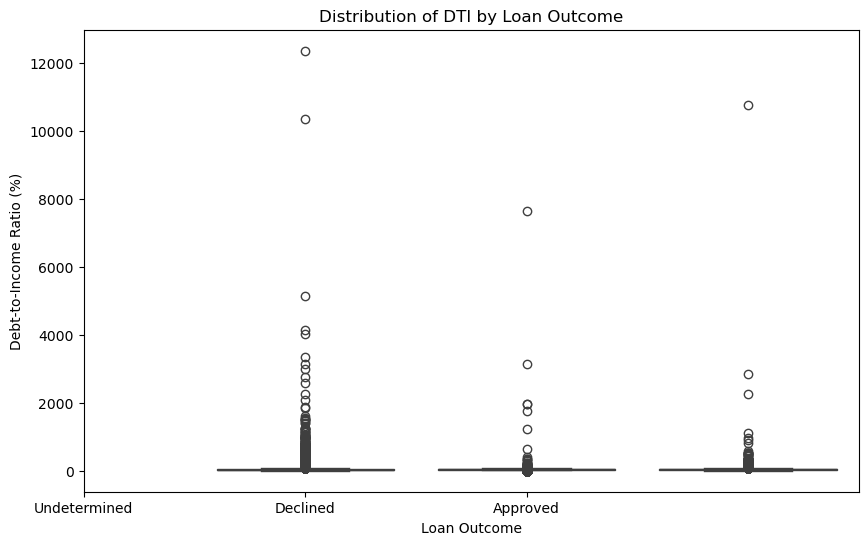

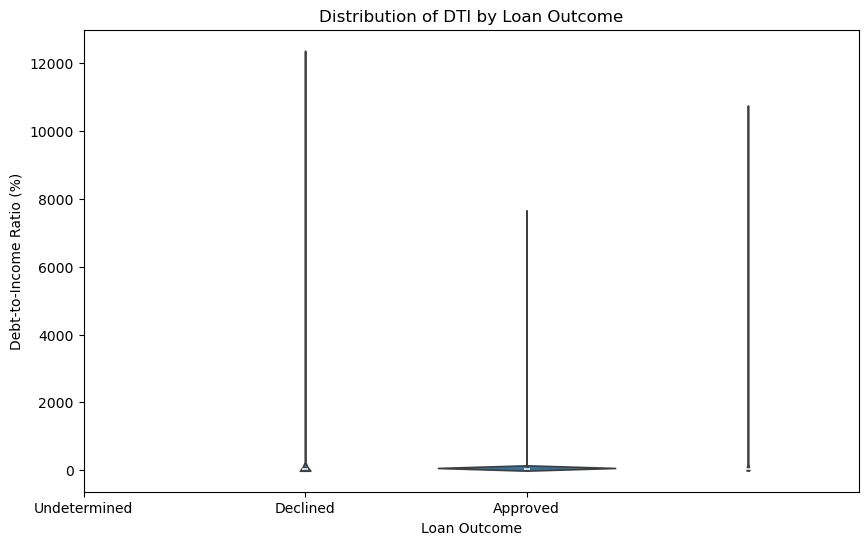


Summary Statistics by Outcome:

Outcome: Undetermined
Count: 91017
Mean DTI: 34.80%
Median DTI: 31.40%
Std DTI: 76.36%
Min DTI: 0.09%
Max DTI: 12350.00%

Outcome: Declined
Count: 43099
Mean DTI: 39.98%
Median DTI: 41.00%
Std DTI: 50.06%
Min DTI: 0.18%
Max DTI: 7650.00%

Outcome: Approved
Count: 483879
Mean DTI: 35.36%
Median DTI: 37.00%
Std DTI: 20.74%
Min DTI: 0.04%
Max DTI: 10750.00%

T-test Results:
t-statistic: nan
p-value: nan


In [241]:


# First, let's create a mapping for the outcome values for better interpretation
outcome_mapping = {
    1: 'Approved',
    0: 'Declined',
    -1: 'Undetermined'
}

# Create a copy of the dataframe with just the columns we need
correlation_df = New_df[['outcome', 'debt_to_income_ratio_numeric']].copy()

# Display basic statistics for DTI grouped by outcome
print("DTI Statistics by Outcome:")
print(correlation_df.groupby('outcome')['debt_to_income_ratio_numeric'].describe())

# Calculate correlation (using point-biserial correlation for binary outcome)
# First, remove any undetermined outcomes (-1)
correlation_df_clean = correlation_df[correlation_df['outcome'] != -1]
correlation = correlation_df_clean['outcome'].corr(correlation_df_clean['debt_to_income_ratio_numeric'])
print(f"\nCorrelation coefficient between Outcome and DTI: {correlation:.4f}")

# Visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome', y='debt_to_income_ratio_numeric', data=correlation_df)
plt.title('Distribution of DTI by Loan Outcome')
plt.xlabel('Loan Outcome')
plt.ylabel('Debt-to-Income Ratio (%)')
plt.xticks([-1, 0, 1], ['Undetermined', 'Declined', 'Approved'])
plt.show()

# Create a violin plot for more detailed distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='outcome', y='debt_to_income_ratio_numeric', data=correlation_df)
plt.title('Distribution of DTI by Loan Outcome')
plt.xlabel('Loan Outcome')
plt.ylabel('Debt-to-Income Ratio (%)')
plt.xticks([-1, 0, 1], ['Undetermined', 'Declined', 'Approved'])
plt.show()

# Calculate summary statistics
print("\nSummary Statistics by Outcome:")
for outcome in sorted(correlation_df['outcome'].unique()):
    dti_values = correlation_df[correlation_df['outcome'] == outcome]['debt_to_income_ratio_numeric']
    print(f"\nOutcome: {outcome_mapping[outcome]}")
    print(f"Count: {len(dti_values)}")
    print(f"Mean DTI: {dti_values.mean():.2f}%")
    print(f"Median DTI: {dti_values.median():.2f}%")
    print(f"Std DTI: {dti_values.std():.2f}%")
    print(f"Min DTI: {dti_values.min():.2f}%")
    print(f"Max DTI: {dti_values.max():.2f}%")

# Optional: Perform statistical test (t-test between approved and declined)
from scipy import stats

approved_dti = correlation_df[correlation_df['outcome'] == 1]['debt_to_income_ratio_numeric']
declined_dti = correlation_df[correlation_df['outcome'] == 0]['debt_to_income_ratio_numeric']

t_stat, p_value = stats.ttest_ind(approved_dti, declined_dti)
print(f"\nT-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

In [243]:
# Create DTI bins for easier analysis
correlation_df['dti_bins'] = pd.cut(correlation_df['debt_to_income_ratio_numeric'], 
                                  bins=[0, 20, 40, 60, 80, 100, float('inf')],
                                  labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%', '>100%'])

# Calculate approval rates by DTI bin
approval_rates = correlation_df[correlation_df['outcome'] != -1].groupby('dti_bins').agg({
    'outcome': ['count', 'mean']
})

print("\nApproval Rates by DTI Range:")
print(approval_rates)


Approval Rates by DTI Range:
         outcome          
           count      mean
dti_bins                  
0-20%      62268  0.948079
20-40%    253855  0.948317
40-60%    197038  0.909530
60-80%      1860  0.964516
80-100%      396  0.936869
>100%        427  0.887588


C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\394310903.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rates = correlation_df[correlation_df['outcome'] != -1].groupby('dti_bins').agg({


Correlation between Outcome and Loan Amount:
              outcome  loan_amount
outcome      1.000000     0.032508
loan_amount  0.032508     1.000000

Correlation coefficient: 0.0325


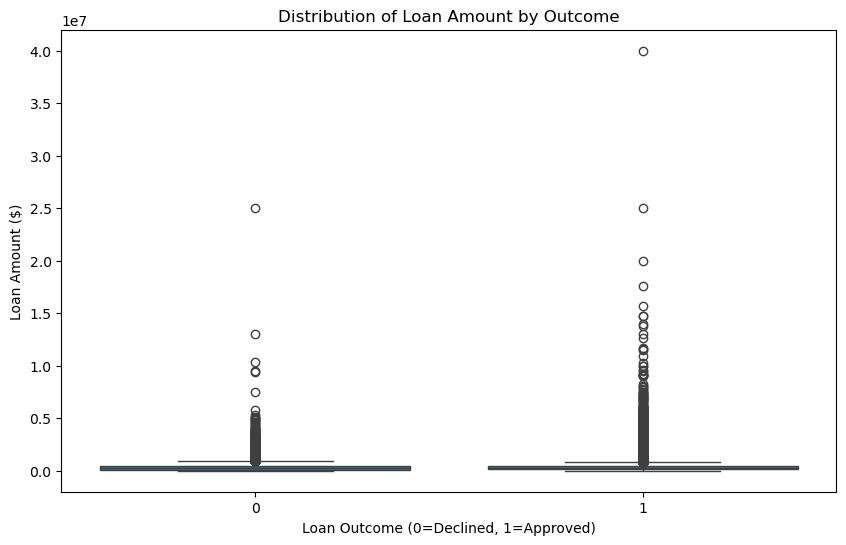


Summary Statistics by Outcome:
            count           mean            std     min       25%       50%  \
outcome                                                                       
0         43099.0  337990.672637  389124.665494  5000.0  115000.0  245000.0   
1        483879.0  377393.800930  326417.504385  5000.0  205000.0  305000.0   

              75%         max  
outcome                        
0        425000.0  25000000.0  
1        465000.0  40000000.0  


In [245]:
# Create a correlation table
correlation_df = New_df[['outcome', 'loan_amount']].copy()

# Remove undetermined outcomes (-1) for cleaner correlation
correlation_df_clean = correlation_df[correlation_df['outcome'] != -1]

# Calculate correlation matrix
correlation_matrix = correlation_df_clean.corr()

print("Correlation between Outcome and Loan Amount:")
print(correlation_matrix)

# If you want just the specific correlation value:
correlation_value = correlation_df_clean['outcome'].corr(correlation_df_clean['loan_amount'])
print(f"\nCorrelation coefficient: {correlation_value:.4f}")

# Create a visualization of the relationship
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome', y='loan_amount', data=correlation_df_clean)
plt.title('Distribution of Loan Amount by Outcome')
plt.xlabel('Loan Outcome (0=Declined, 1=Approved)')
plt.ylabel('Loan Amount ($)')
plt.show()

# Calculate summary statistics
print("\nSummary Statistics by Outcome:")
print(correlation_df_clean.groupby('outcome')['loan_amount'].describe())

Outcome Distribution by Applicant Gender:

Counts:
outcome              -1      0       1
applicant_gender                      
Both                 48     36     207
Female            27614  14222  127402
Male              56085  25719  268358
Unknown            7270   3122   87912

Percentages by Applicant Gender:
outcome                  -1          0          1
applicant_gender                                 
Both              16.494845  12.371134  71.134021
Female            16.316666   8.403550  75.279784
Male              16.016872   7.344886  76.638242
Unknown            7.395426   3.175863  89.428711


IndexError: index 2 is out of bounds for axis 1 with size 2

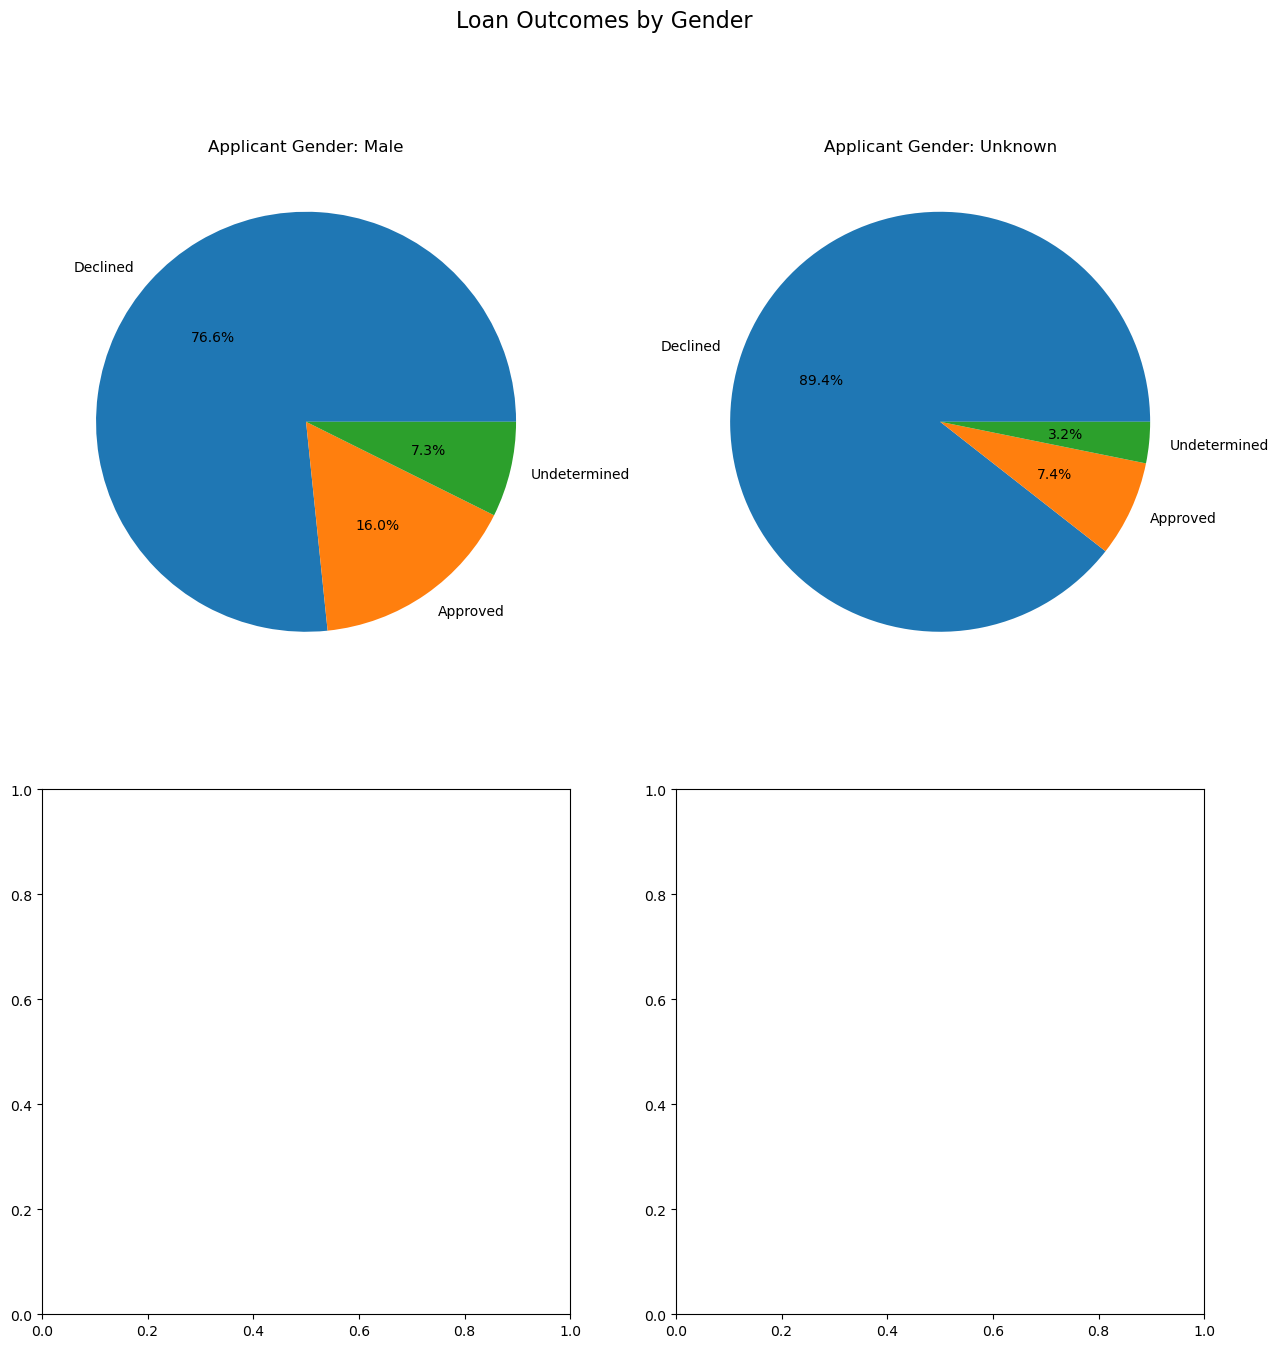

In [247]:
# First, let's analyze applicant gender
print("Outcome Distribution by Applicant Gender:")
applicant_outcome = pd.crosstab(new_df['applicant_gender'], new_df['outcome'])
print("\nCounts:")
print(applicant_outcome)

# Calculate percentages
applicant_pct = pd.crosstab(new_df['applicant_gender'], new_df['outcome'], normalize='index') * 100
print("\nPercentages by Applicant Gender:")
print(applicant_pct)

# Create pie charts for each gender
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Loan Outcomes by Gender', fontsize=16)

# Pie charts for Applicant Gender
for idx, gender in enumerate(new_df['applicant_gender'].unique()):
    gender_data = new_df[new_df['applicant_gender'] == gender]['outcome'].value_counts()
    
    # Plot in the first row
    axes[0, idx].pie(gender_data, labels=['Declined', 'Approved', 'Undetermined'] if -1 in gender_data.index 
                     else ['Declined', 'Approved'],
                     autopct='%1.1f%%')
    axes[0, idx].set_title(f'Applicant Gender: {gender}')

print("\n" + "="*50 + "\n")

# Now analyze co-applicant gender
print("Outcome Distribution by Co-Applicant Gender:")
co_applicant_outcome = pd.crosstab(new_df['co_applicant_gender'], new_df['outcome'])
print("\nCounts:")
print(co_applicant_outcome)

# Calculate percentages
co_applicant_pct = pd.crosstab(new_df['co_applicant_gender'], new_df['outcome'], normalize='index') * 100
print("\nPercentages by Co-Applicant Gender:")
print(co_applicant_pct)

# Pie charts for Co-Applicant Gender
for idx, gender in enumerate(new_df['co_applicant_gender'].unique()):
    gender_data = new_df[new_df['co_applicant_gender'] == gender]['outcome'].value_counts()
    
    # Plot in the second row
    axes[1, idx].pie(gender_data, labels=['Declined', 'Approved', 'Undetermined'] if -1 in gender_data.index 
                     else ['Declined', 'Approved'],
                     autopct='%1.1f%%')
    axes[1, idx].set_title(f'Co-Applicant Gender: {gender}')

plt.tight_layout()
plt.show()



In [249]:
# Calculate chi-square test for independence
from scipy.stats import chi2_contingency

# Remove undetermined outcomes for cleaner analysis
clean_df = new_df[new_df['outcome'] != -1]

# Chi-square test for applicant gender
chi2_applicant, p_value_applicant, _, _ = chi2_contingency(
    pd.crosstab(clean_df['applicant_gender'], clean_df['outcome'])
)

# Chi-square test for co-applicant gender
chi2_co_applicant, p_value_co_applicant, _, _ = chi2_contingency(
    pd.crosstab(clean_df['co_applicant_gender'], clean_df['outcome'])
)

print("\nChi-square test results:")
print(f"Applicant Gender: chi2 = {chi2_applicant:.4f}, p-value = {p_value_applicant:.4f}")
print(f"Co-Applicant Gender: chi2 = {chi2_co_applicant:.4f}, p-value = {p_value_co_applicant:.4f}")



Chi-square test results:
Applicant Gender: chi2 = 3529.1356, p-value = 0.0000
Co-Applicant Gender: chi2 = 163.6725, p-value = 0.0000


Analysis for Applicant Gender:
--------------------------------

Approval Rates by Applicant Gender:
                   count  approval_rate  approved_count
applicant_gender                                       
Both                 243       0.851852           207.0
Female            141624       0.899579        127402.0
Male              294077       0.912543        268358.0
Unknown            91034       0.965705         87912.0

Correlation with outcome:
applicant_gender      Both    Female      Male   Unknown
outcome           0.851852  0.899579  0.912543  0.965705


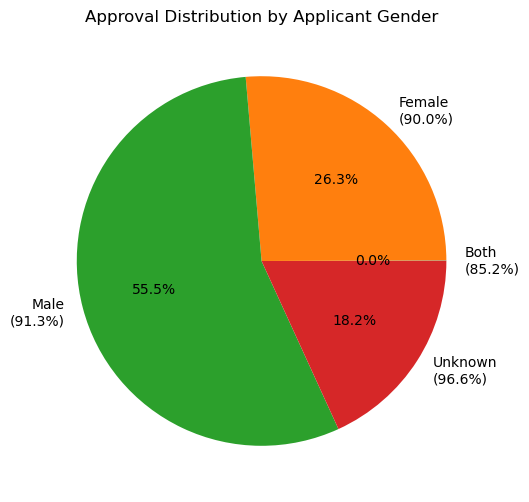


Analysis for Co-Applicant Gender:
--------------------------------

Approval Rates by Co-Applicant Gender:
                      count  approval_rate  approved_count
co_applicant_gender                                       
Both                    288       0.899306           259.0
Female               154152       0.924808        142561.0
Male                  57466       0.909146         52245.0
Unknown              315072       0.916660        288814.0

Correlation with outcome:
co_applicant_gender      Both    Female      Male  Unknown
outcome              0.899306  0.924808  0.909146  0.91666


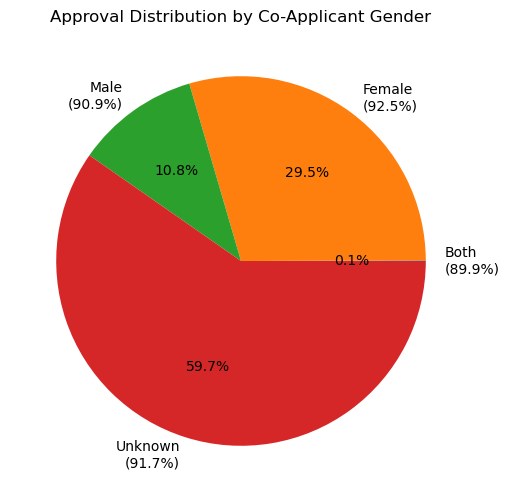


Gender Combination Analysis:
--------------------------------

Approval Rates by Gender Combination (sorted by approval rate):
                                       count      mean
applicant_gender co_applicant_gender                  
Unknown          Unknown               89542  0.966809
Female           Both                     53  0.943396
Male             Female               145395  0.927288
Unknown          Both                    102  0.921569
Female           Male                  47409  0.913814
Both             Male                     58  0.913793
Unknown          Male                    607  0.899506
Male             Unknown              139175  0.898940
Unknown          Female                  783  0.896552
Female           Unknown               86268  0.893309
Both             Female                   80  0.887500
Male             Both                    115  0.886957
                 Male                   9392  0.886180
Female           Female                 7894  0

In [251]:
# First, let's calculate correlations and percentages for applicant gender
print("Analysis for Applicant Gender:")
print("--------------------------------")

# Calculate approval rates by applicant gender
applicant_approval = new_df[new_df['outcome'] != -1].groupby('applicant_gender')['outcome'].agg(['count', 'mean'])
applicant_approval['approved_count'] = applicant_approval['count'] * applicant_approval['mean']
applicant_approval = applicant_approval.rename(columns={'mean': 'approval_rate'})

print("\nApproval Rates by Applicant Gender:")
print(applicant_approval)

# Calculate correlations
applicant_correlation = new_df[new_df['outcome'] != -1].pivot_table(
    values='outcome',
    columns='applicant_gender',
    aggfunc='mean'
)
print("\nCorrelation with outcome:")
print(applicant_correlation)

# Create pie chart for applicant gender approval rates
plt.figure(figsize=(10, 6))
plt.pie(applicant_approval['approved_count'], 
        labels=[f"{gender}\n({rate:.1%})" for gender, rate in zip(applicant_approval.index, applicant_approval['approval_rate'])],
        autopct='%1.1f%%')
plt.title('Approval Distribution by Applicant Gender')
plt.show()

print("\nAnalysis for Co-Applicant Gender:")
print("--------------------------------")

# Calculate approval rates by co-applicant gender
coapplicant_approval = new_df[new_df['outcome'] != -1].groupby('co_applicant_gender')['outcome'].agg(['count', 'mean'])
coapplicant_approval['approved_count'] = coapplicant_approval['count'] * coapplicant_approval['mean']
coapplicant_approval = coapplicant_approval.rename(columns={'mean': 'approval_rate'})

print("\nApproval Rates by Co-Applicant Gender:")
print(coapplicant_approval)

# Calculate correlations
coapplicant_correlation = new_df[new_df['outcome'] != -1].pivot_table(
    values='outcome',
    columns='co_applicant_gender',
    aggfunc='mean'
)
print("\nCorrelation with outcome:")
print(coapplicant_correlation)

# Create pie chart for co-applicant gender approval rates
plt.figure(figsize=(10, 6))
plt.pie(coapplicant_approval['approved_count'], 
        labels=[f"{gender}\n({rate:.1%})" for gender, rate in zip(coapplicant_approval.index, coapplicant_approval['approval_rate'])],
        autopct='%1.1f%%')
plt.title('Approval Distribution by Co-Applicant Gender')
plt.show()

# Print the gender combination with highest approval rate
print("\nGender Combination Analysis:")
print("--------------------------------")
gender_combo_approval = new_df[new_df['outcome'] != -1].groupby(['applicant_gender', 'co_applicant_gender'])['outcome'].agg(['count', 'mean'])
gender_combo_approval = gender_combo_approval.sort_values('mean', ascending=False)
print("\nApproval Rates by Gender Combination (sorted by approval rate):")
print(gender_combo_approval)

# Get the combination with highest approval rate
highest_combo = gender_combo_approval.index[0]
highest_rate = gender_combo_approval.iloc[0]['mean']
print(f"\nHighest approval rate: {highest_rate:.1%} for Applicant: {highest_combo[0]}, Co-Applicant: {highest_combo[1]}")



Approval Rates by Applicant Gender:
                   Total  Approval_Rate
applicant_gender                       
Both                 156      87.820513
Female             55356      90.935039
Male              154902      92.476534

Approval Rates by Co-Applicant Gender:
                      Total  Approval_Rate
co_applicant_gender                       
Both                    186      88.709677
Female               153369      92.495224
Male                  56859      90.924920


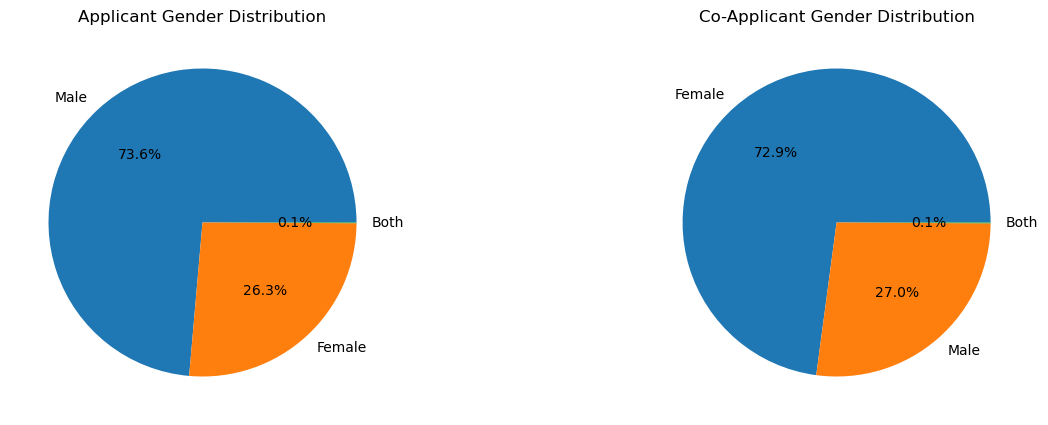

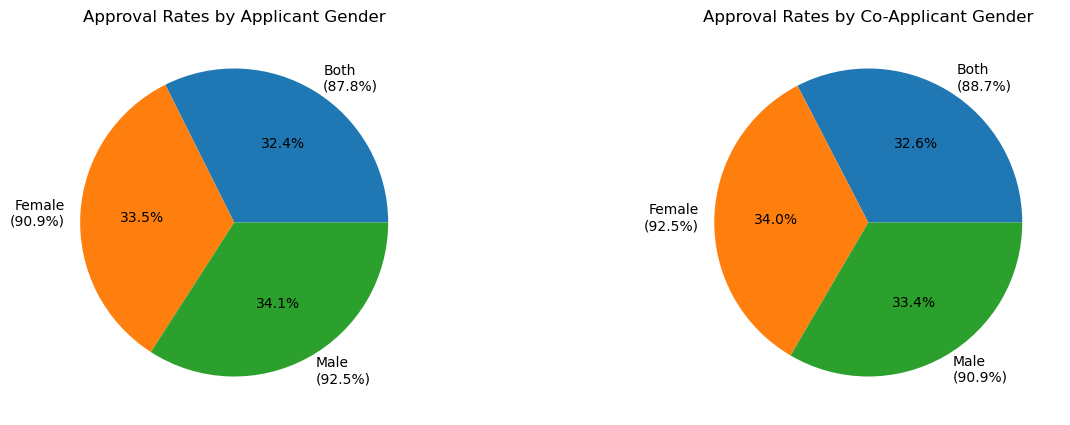


Correlation Matrix:
                           outcome  applicant_gender_code  \
outcome                   1.000000               0.025426   
applicant_gender_code     0.025426               1.000000   
co_applicant_gender_code -0.025394              -0.781449   

                          co_applicant_gender_code  
outcome                                  -0.025394  
applicant_gender_code                    -0.781449  
co_applicant_gender_code                  1.000000  

Approval Rates by Gender Combination (sorted by approval rate):
                                       Total  Approval_Rate
applicant_gender co_applicant_gender                       
Female           Both                     53      94.339623
Male             Female               145395      92.728773
Female           Male                  47409      91.381383
Both             Male                     58      91.379310
                 Female                   80      88.750000
Male             Both                

In [253]:
# First, let's filter out unknown gender values and create clean data
clean_df = New_df[
    (New_df['applicant_gender'] != 'Unknown') & 
    (New_df['co_applicant_gender'] != 'Unknown') & 
    (New_df['outcome'] != -1)
].copy()

# Calculate approval rates by applicant gender
applicant_approval = clean_df.groupby('applicant_gender')['outcome'].agg(['count', 'mean'])
applicant_approval.columns = ['Total', 'Approval_Rate']
applicant_approval['Approval_Rate'] = applicant_approval['Approval_Rate'] * 100

print("\nApproval Rates by Applicant Gender:")
print(applicant_approval)

# Calculate approval rates by co-applicant gender
co_applicant_approval = clean_df.groupby('co_applicant_gender')['outcome'].agg(['count', 'mean'])
co_applicant_approval.columns = ['Total', 'Approval_Rate']
co_applicant_approval['Approval_Rate'] = co_applicant_approval['Approval_Rate'] * 100

print("\nApproval Rates by Co-Applicant Gender:")
print(co_applicant_approval)

# Create pie charts
import matplotlib.pyplot as plt

# Pie chart for applicant gender distribution
plt.figure(figsize=(15, 5))

# Applicant Gender Distribution
plt.subplot(1, 2, 1)
applicant_gender_dist = clean_df['applicant_gender'].value_counts()
plt.pie(applicant_gender_dist, labels=applicant_gender_dist.index, autopct='%1.1f%%')
plt.title('Applicant Gender Distribution')

# Co-Applicant Gender Distribution
plt.subplot(1, 2, 2)
co_applicant_gender_dist = clean_df['co_applicant_gender'].value_counts()
plt.pie(co_applicant_gender_dist, labels=co_applicant_gender_dist.index, autopct='%1.1f%%')
plt.title('Co-Applicant Gender Distribution')

plt.show()

# Create pie charts for approval rates
plt.figure(figsize=(15, 5))

# Applicant Gender Approval Rates
plt.subplot(1, 2, 1)
plt.pie(applicant_approval['Approval_Rate'], 
        labels=[f"{gender}\n({rate:.1f}%)" for gender, rate in zip(applicant_approval.index, applicant_approval['Approval_Rate'])],
        autopct='%1.1f%%')
plt.title('Approval Rates by Applicant Gender')

# Co-Applicant Gender Approval Rates
plt.subplot(1, 2, 2)
plt.pie(co_applicant_approval['Approval_Rate'],
        labels=[f"{gender}\n({rate:.1f}%)" for gender, rate in zip(co_applicant_approval.index, co_applicant_approval['Approval_Rate'])],
        autopct='%1.1f%%')
plt.title('Approval Rates by Co-Applicant Gender')

plt.show()

# Calculate correlation (using dummy variables)
from sklearn.preprocessing import LabelEncoder

# Create dummy variables for gender
le = LabelEncoder()
clean_df['applicant_gender_code'] = le.fit_transform(clean_df['applicant_gender'])
clean_df['co_applicant_gender_code'] = le.fit_transform(clean_df['co_applicant_gender'])

# Calculate correlations
correlations = clean_df[['outcome', 'applicant_gender_code', 'co_applicant_gender_code']].corr()

print("\nCorrelation Matrix:")
print(correlations)

# Find gender combination with highest approval rate
gender_combo_approval = clean_df.groupby(['applicant_gender', 'co_applicant_gender'])['outcome'].agg(['count', 'mean'])
gender_combo_approval.columns = ['Total', 'Approval_Rate']
gender_combo_approval['Approval_Rate'] = gender_combo_approval['Approval_Rate'] * 100
gender_combo_approval = gender_combo_approval.sort_values('Approval_Rate', ascending=False)

print("\nApproval Rates by Gender Combination (sorted by approval rate):")
print(gender_combo_approval)

C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\1935579990.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rates = clean_df.groupby('dti_bins').agg({


Approval Rates by DTI Range:
           Total  Approval_Rate
dti_bins                       
0-20%      62268          94.81
20-40%    253855          94.83
40-60%    197038          90.95
60-80%      1860          96.45
80-100%      396          93.69
>100%        427          88.76


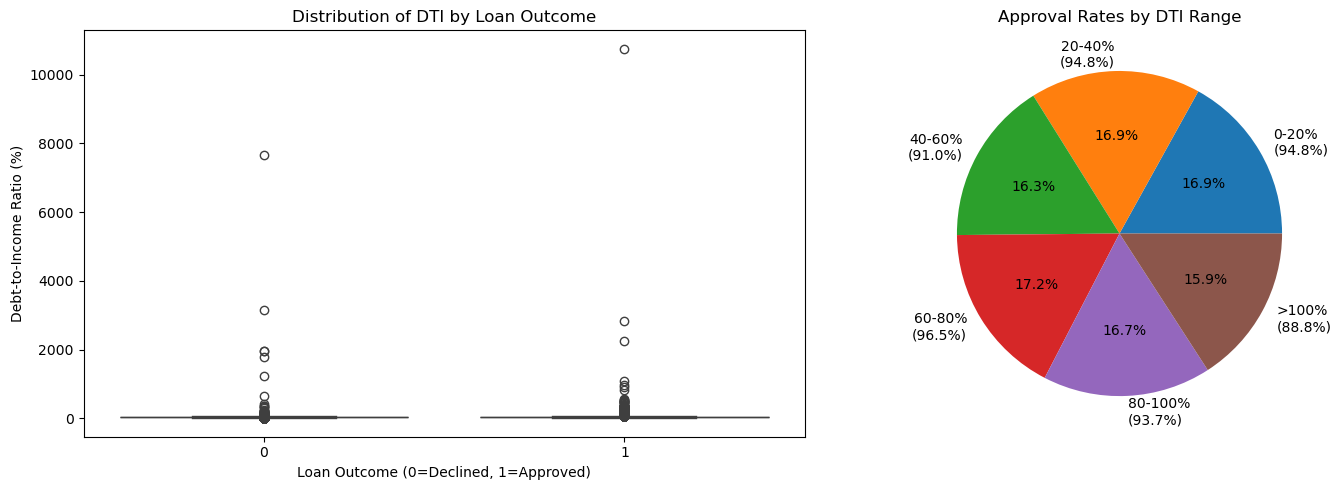


DTI Summary Statistics by Outcome:
            count       mean        std   min   25%   50%   75%      max
outcome                                                                 
0         34318.0  39.975380  50.060182  0.18  33.0  41.0  48.0   7650.0
1        481526.0  35.359288  20.743703  0.04  25.0  37.0  44.0  10750.0

DTI Thresholds:
Minimum DTI for Approved Loans: 0.04%
Maximum DTI for Approved Loans: 10750.00%
Median DTI for Approved Loans: 37.00%
Median DTI for Declined Loans: 41.00%

Probability of Approval by DTI Range:
DTI 0-20%: 94.8% approval rate (62268 cases)
DTI 20-40%: 94.8% approval rate (253855 cases)
DTI 40-60%: 91.0% approval rate (197038 cases)
DTI 60-80%: 96.5% approval rate (1860 cases)
DTI 80-100%: 93.7% approval rate (396 cases)
DTI >100%: 88.8% approval rate (427 cases)

Optimal DTI Range (highest approval rate): 60-80%

Correlation between Outcome and DTI: -0.0482


In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create clean dataset excluding undetermined outcomes
clean_df = New_df[New_df['outcome'] != -1].copy()

# Create DTI bins for analysis
bins = [0, 20, 40, 60, 80, 100, float('inf')]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%', '>100%']
clean_df['dti_bins'] = pd.cut(clean_df['debt_to_income_ratio_numeric'], bins=bins, labels=labels)

# Calculate approval rates by DTI bin
approval_rates = clean_df.groupby('dti_bins').agg({
    'outcome': ['count', 'mean']
}).round(4)
approval_rates.columns = ['Total', 'Approval_Rate']
approval_rates['Approval_Rate'] = approval_rates['Approval_Rate'] * 100

print("Approval Rates by DTI Range:")
print(approval_rates)

# Create visualizations
plt.figure(figsize=(15, 5))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='outcome', y='debt_to_income_ratio_numeric', data=clean_df)
plt.title('Distribution of DTI by Loan Outcome')
plt.xlabel('Loan Outcome (0=Declined, 1=Approved)')
plt.ylabel('Debt-to-Income Ratio (%)')

# Pie chart of approval rates by DTI bin
plt.subplot(1, 2, 2)
plt.pie(approval_rates['Approval_Rate'], 
        labels=[f"{label}\n({rate:.1f}%)" for label, rate in zip(approval_rates.index, approval_rates['Approval_Rate'])],
        autopct='%1.1f%%')
plt.title('Approval Rates by DTI Range')

plt.tight_layout()
plt.show()

# Calculate summary statistics
print("\nDTI Summary Statistics by Outcome:")
print(clean_df.groupby('outcome')['debt_to_income_ratio_numeric'].describe())

# Find the DTI thresholds
print("\nDTI Thresholds:")
print(f"Minimum DTI for Approved Loans: {clean_df[clean_df['outcome'] == 1]['debt_to_income_ratio_numeric'].min():.2f}%")
print(f"Maximum DTI for Approved Loans: {clean_df[clean_df['outcome'] == 1]['debt_to_income_ratio_numeric'].max():.2f}%")
print(f"Median DTI for Approved Loans: {clean_df[clean_df['outcome'] == 1]['debt_to_income_ratio_numeric'].median():.2f}%")
print(f"Median DTI for Declined Loans: {clean_df[clean_df['outcome'] == 0]['debt_to_income_ratio_numeric'].median():.2f}%")

# Calculate probability of approval at different DTI ranges
print("\nProbability of Approval by DTI Range:")
for bin_label in labels:
    bin_data = clean_df[clean_df['dti_bins'] == bin_label]
    approval_prob = (bin_data['outcome'] == 1).mean() * 100
    total_cases = len(bin_data)
    print(f"DTI {bin_label}: {approval_prob:.1f}% approval rate ({total_cases} cases)")

# Find the optimal DTI range (highest approval rate)
optimal_range = approval_rates.sort_values('Approval_Rate', ascending=False).index[0]
print(f"\nOptimal DTI Range (highest approval rate): {optimal_range}")

# Calculate correlation
correlation = clean_df['outcome'].corr(clean_df['debt_to_income_ratio_numeric'])
print(f"\nCorrelation between Outcome and DTI: {correlation:.4f}")

Approval Rates by Race:
                                           Total_Applications  Approval_Rate
race                                                                        
White                                                  437545          92.49
Joint                                                   14530          92.26
Asian                                                   48793          90.91
Native Hawaiian or Other Pacific Islander                1493          88.88
2 or more minority races                                  721          83.77
Black or African American                               21196          81.73
American Indian or Alaska Native                         2700          81.30


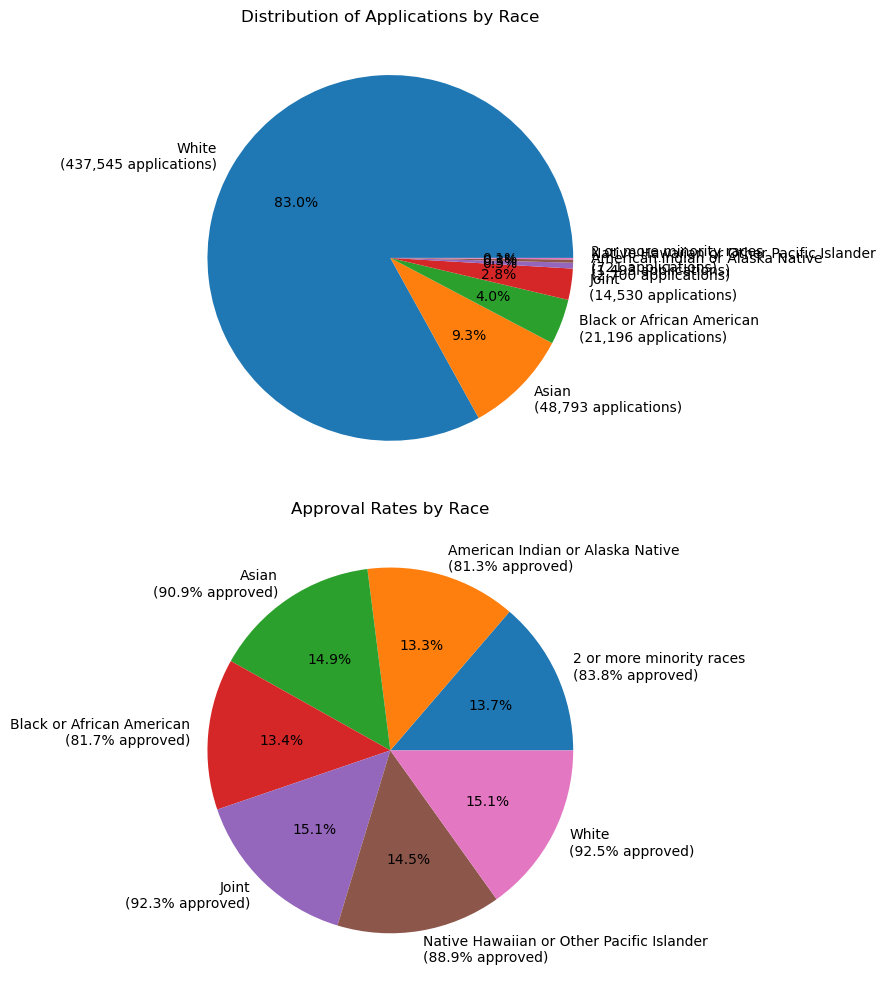


Detailed Statistics by Race:

Race with Highest Approval Rate:
White:
Approval Rate: 92.5%
Total Applications: 437,545.0

Race with Lowest Approval Rate:
American Indian or Alaska Native:
Approval Rate: 81.3%
Total Applications: 2,700.0

Overall Approval Rate: 91.8%

Percentage Points Difference from Overall Approval Rate:
White: +0.7 percentage points
Joint: +0.4 percentage points
Asian: -0.9 percentage points
Native Hawaiian or Other Pacific Islander: -2.9 percentage points
2 or more minority races: -8.1 percentage points
Black or African American: -10.1 percentage points
American Indian or Alaska Native: -10.5 percentage points

Detailed Breakdown by Race:
                                           Total_Applications  Total_Approved  \
race                                                                            
White                                                  437545          404668   
Joint                                                   14530           13406   
Asian  

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

# Create clean dataset excluding undetermined outcomes
clean_df = New_df[New_df['outcome'] != -1].copy()

# Calculate approval rates by race
race_approval = clean_df.groupby('race').agg({
    'outcome': ['count', 'mean']
}).round(4)
race_approval.columns = ['Total_Applications', 'Approval_Rate']
race_approval['Approval_Rate'] = race_approval['Approval_Rate'] * 100

# Sort by approval rate to identify highest and lowest
race_approval_sorted = race_approval.sort_values('Approval_Rate', ascending=False)

print("Approval Rates by Race:")
print(race_approval_sorted)

# Create visualizations
plt.figure(figsize=(15, 10))

# Pie chart for race distribution
plt.subplot(2, 1, 1)
race_dist = clean_df['race'].value_counts()
plt.pie(race_dist, 
        labels=[f"{race}\n({count:,} applications)" for race, count in race_dist.items()],
        autopct='%1.1f%%')
plt.title('Distribution of Applications by Race')

# Pie chart for approval rates
plt.subplot(2, 1, 2)
plt.pie(race_approval['Approval_Rate'], 
        labels=[f"{race}\n({rate:.1f}% approved)" for race, rate in zip(race_approval.index, race_approval['Approval_Rate'])],
        autopct='%1.1f%%')
plt.title('Approval Rates by Race')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics by Race:")
print("\nRace with Highest Approval Rate:")
highest_approval = race_approval_sorted.iloc[0]
print(f"{race_approval_sorted.index[0]}:")
print(f"Approval Rate: {highest_approval['Approval_Rate']:.1f}%")
print(f"Total Applications: {highest_approval['Total_Applications']:,}")

print("\nRace with Lowest Approval Rate:")
lowest_approval = race_approval_sorted.iloc[-1]
print(f"{race_approval_sorted.index[-1]}:")
print(f"Approval Rate: {lowest_approval['Approval_Rate']:.1f}%")
print(f"Total Applications: {lowest_approval['Total_Applications']:,}")

# Calculate overall approval rate for comparison
overall_approval = clean_df['outcome'].mean() * 100
print(f"\nOverall Approval Rate: {overall_approval:.1f}%")

# Calculate percentage difference from overall approval rate
print("\nPercentage Points Difference from Overall Approval Rate:")
for race in race_approval_sorted.index:
    diff = race_approval_sorted.loc[race, 'Approval_Rate'] - overall_approval
    print(f"{race}: {diff:+.1f} percentage points")

# Calculate total number of applications and approvals by race
race_details = clean_df.groupby('race').agg({
    'outcome': ['count', 'sum']
})
race_details.columns = ['Total_Applications', 'Total_Approved']
race_details['Approval_Rate'] = (race_details['Total_Approved'] / race_details['Total_Applications'] * 100).round(1)

print("\nDetailed Breakdown by Race:")
print(race_details.sort_values('Approval_Rate', ascending=False))

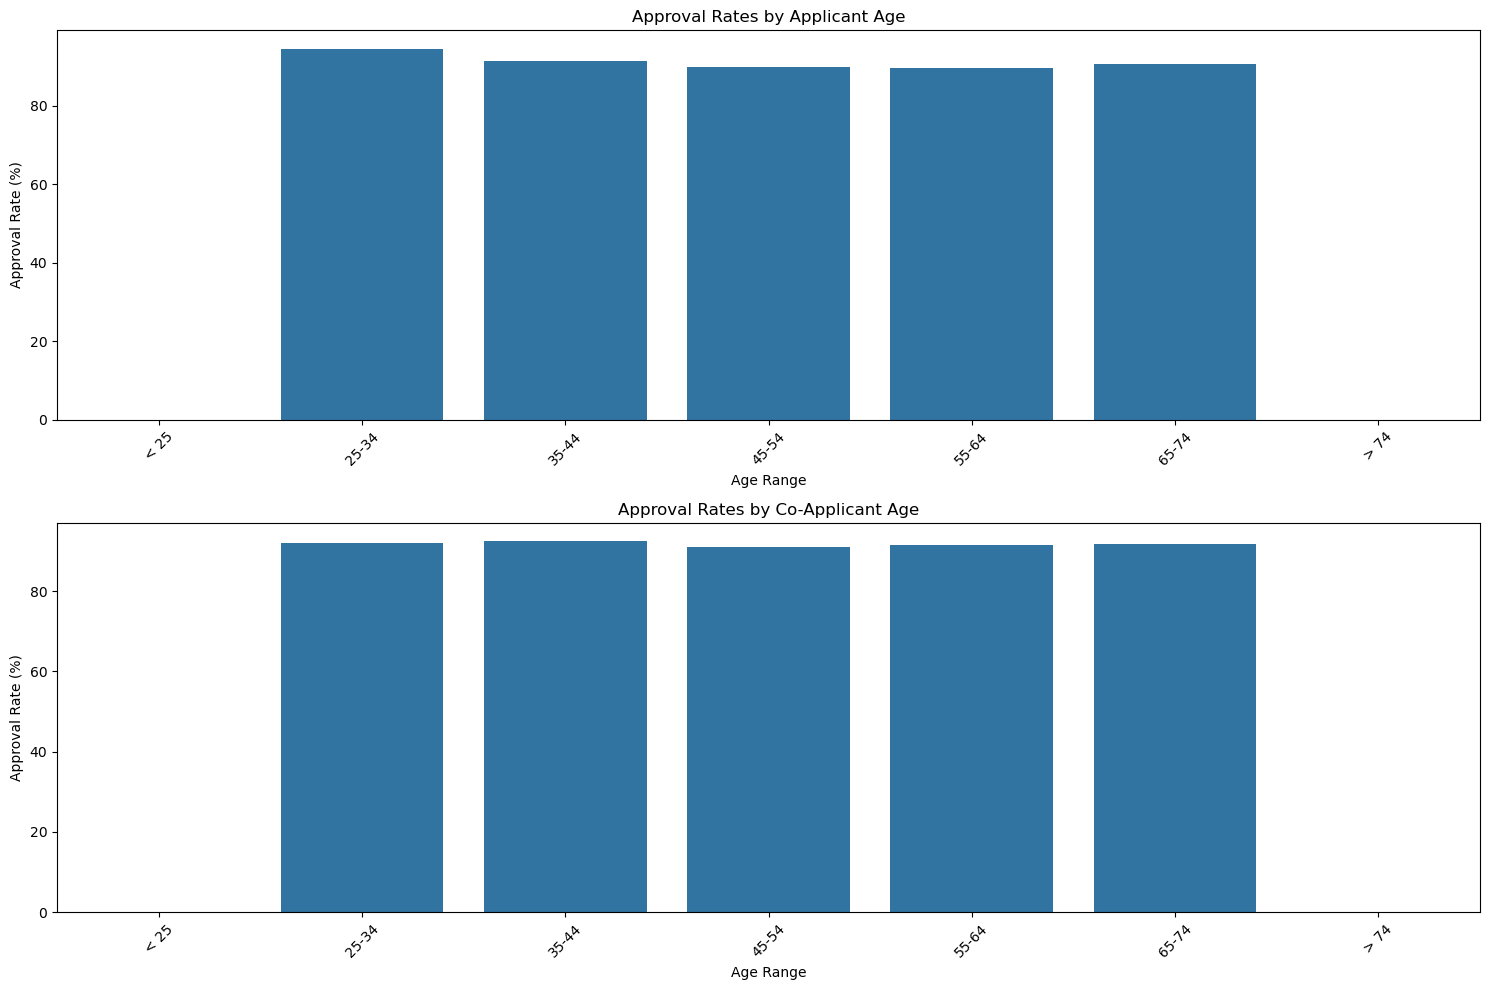


Approval Rates by Applicant Age:
                  Total  Approval_Rate
applicant_age                         
25-34          190922.0          94.42
35-44          128067.0          91.33
65-74           31080.0          90.67
45-54           88081.0          89.88
55-64           60557.0          89.59
< 25                NaN            NaN
> 74                NaN            NaN

Approval Rates by Co-Applicant Age:
                     Total  Approval_Rate
co-applicant_age                         
35-44              59595.0          92.40
25-34             363878.0          91.94
65-74              17914.0          91.84
55-64              31668.0          91.43
45-54              39246.0          91.11
< 25                   NaN            NaN
> 74                   NaN            NaN

Applicant Age Analysis:
Age range with highest approval rate: 25-34 (94.4%)
Age range with lowest approval rate: 55-64 (89.6%)

Co-Applicant Age Analysis:
Age range with highest approval rate: 35-44 

ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1500x500 with 1 Axes>

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create clean dataset excluding undetermined outcomes
clean_df = new_df[new_df['outcome'] != -1].copy()

# Define age bins order for proper plotting
age_order = ['< 25', '25-34', '35-44', '45-54', '55-64', '65-74', '> 74']

# Calculate approval rates by applicant age
applicant_age_approval = clean_df.groupby('applicant_age').agg({
    'outcome': ['count', 'mean']
}).round(4)
applicant_age_approval.columns = ['Total', 'Approval_Rate']
applicant_age_approval['Approval_Rate'] = applicant_age_approval['Approval_Rate'] * 100
applicant_age_approval = applicant_age_approval.reindex(age_order)

# Calculate approval rates by co-applicant age
co_applicant_age_approval = clean_df.groupby('co-applicant_age').agg({
    'outcome': ['count', 'mean']
}).round(4)
co_applicant_age_approval.columns = ['Total', 'Approval_Rate']
co_applicant_age_approval['Approval_Rate'] = co_applicant_age_approval['Approval_Rate'] * 100
co_applicant_age_approval = co_applicant_age_approval.reindex(age_order)

# Create visualizations
plt.figure(figsize=(15, 10))

# Bar chart for applicant age approval rates
plt.subplot(2, 1, 1)
sns.barplot(x=applicant_age_approval.index, y='Approval_Rate', data=applicant_age_approval.reset_index())
plt.title('Approval Rates by Applicant Age')
plt.xlabel('Age Range')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)

# Bar chart for co-applicant age approval rates
plt.subplot(2, 1, 2)
sns.barplot(x=co_applicant_age_approval.index, y='Approval_Rate', data=co_applicant_age_approval.reset_index())
plt.title('Approval Rates by Co-Applicant Age')
plt.xlabel('Age Range')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nApproval Rates by Applicant Age:")
print(applicant_age_approval.sort_values('Approval_Rate', ascending=False))

print("\nApproval Rates by Co-Applicant Age:")
print(co_applicant_age_approval.sort_values('Approval_Rate', ascending=False))

# Find age ranges with highest and lowest approval rates
print("\nApplicant Age Analysis:")
highest_approval_age = applicant_age_approval['Approval_Rate'].idxmax()
lowest_approval_age = applicant_age_approval['Approval_Rate'].idxmin()
print(f"Age range with highest approval rate: {highest_approval_age} ({applicant_age_approval.loc[highest_approval_age, 'Approval_Rate']:.1f}%)")
print(f"Age range with lowest approval rate: {lowest_approval_age} ({applicant_age_approval.loc[lowest_approval_age, 'Approval_Rate']:.1f}%)")

print("\nCo-Applicant Age Analysis:")
highest_approval_co_age = co_applicant_age_approval['Approval_Rate'].idxmax()
lowest_approval_co_age = co_applicant_age_approval['Approval_Rate'].idxmin()
print(f"Age range with highest approval rate: {highest_approval_co_age} ({co_applicant_age_approval.loc[highest_approval_co_age, 'Approval_Rate']:.1f}%)")
print(f"Age range with lowest approval rate: {lowest_approval_co_age} ({co_applicant_age_approval.loc[lowest_approval_co_age, 'Approval_Rate']:.1f}%)")

# Distribution of applications by age
print("\nDistribution of Applications:")
print("\nApplicant Age Distribution:")
print(applicant_age_approval['Total'].value_counts().sort_index())
print("\nCo-Applicant Age Distribution:")
print(co_applicant_age_approval['Total'].value_counts().sort_index())

# Create pie charts for age distribution
plt.figure(figsize=(15, 5))

# Applicant Age Distribution
plt.subplot(1, 2, 1)
plt.pie(applicant_age_approval['Total'], 
        labels=[f"{age}\n({count:,})" for age, count in zip(applicant_age_approval.index, applicant_age_approval['Total'])],
        autopct='%1.1f%%')
plt.title('Distribution of Applicant Ages')

# Co-Applicant Age Distribution
plt.subplot(1, 2, 2)
plt.pie(co_applicant_age_approval['Total'],
        labels=[f"{age}\n({count:,})" for age, count in zip(co_applicant_age_approval.index, co_applicant_age_approval['Total'])],
        autopct='%1.1f%%')
plt.title('Distribution of Co-Applicant Ages')

plt.tight_layout()
plt.show()

C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\1794048764.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_approval = clean_df.groupby('loan_amount_bins').agg({


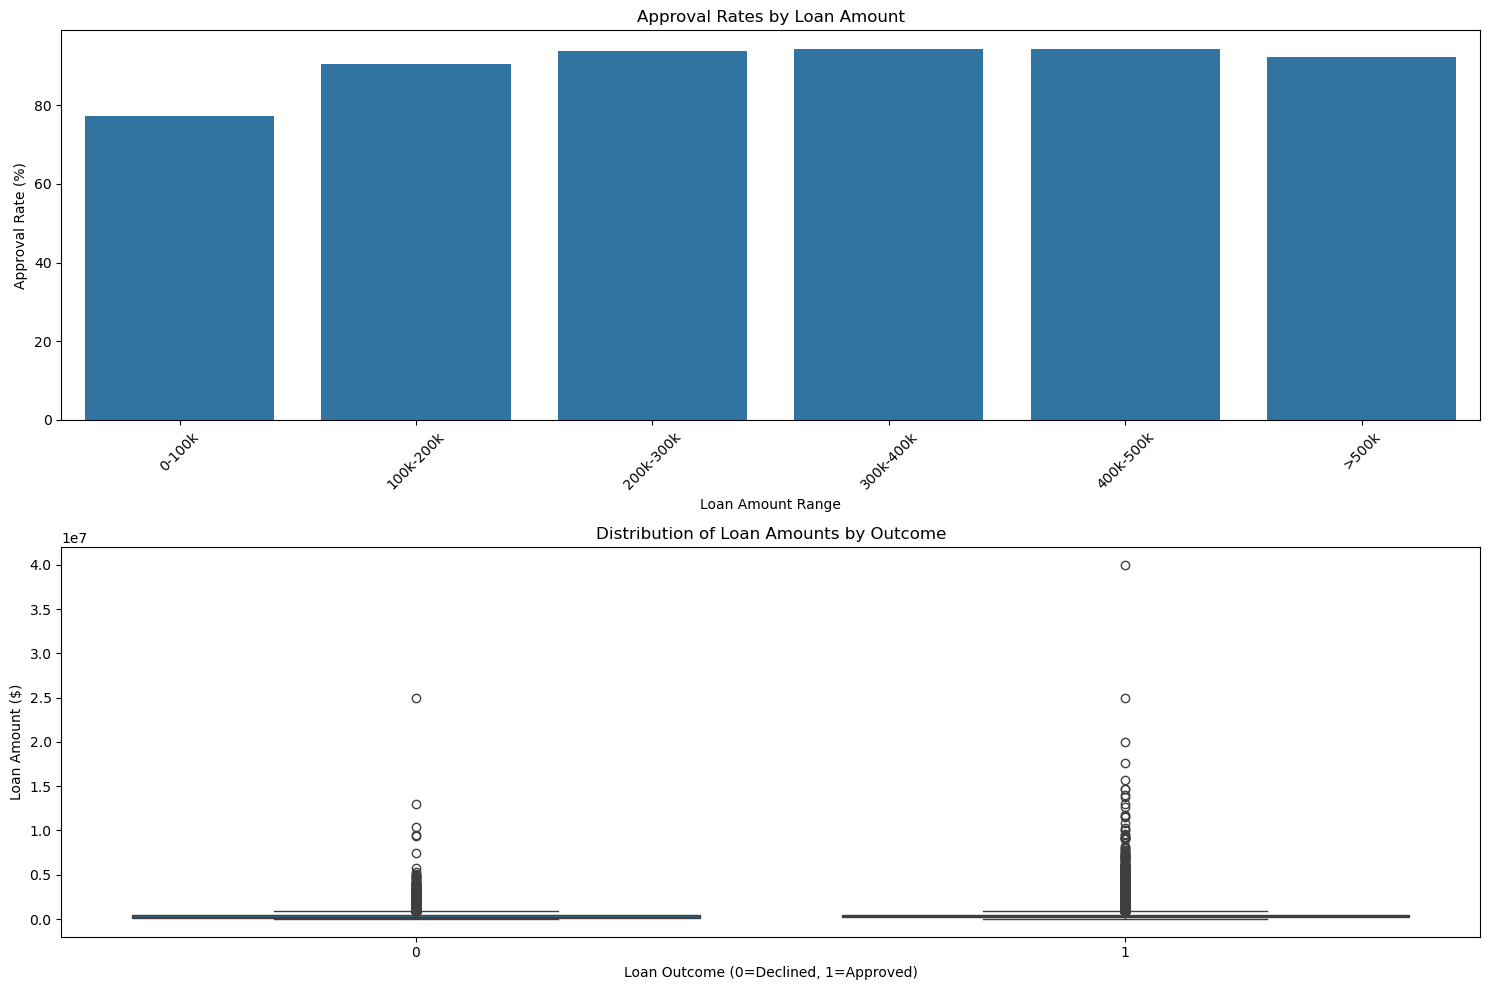


Approval Rates by Loan Amount Range:
                   Total  Approval_Rate
loan_amount_bins                       
400k-500k          68964          94.28
300k-400k          94222          94.23
200k-300k         128160          93.77
>500k             105059          92.33
100k-200k          90985          90.46
0-100k             39588          77.27

Loan Amount Statistics for Approved Loans:
Minimum: $5,000.00
Maximum: $40,000,000.00
Average: $377,393.80
Median: $305,000.00

Loan Amount Statistics for Declined Loans:
Minimum: $5,000.00
Maximum: $25,000,000.00
Average: $337,990.67
Median: $245,000.00


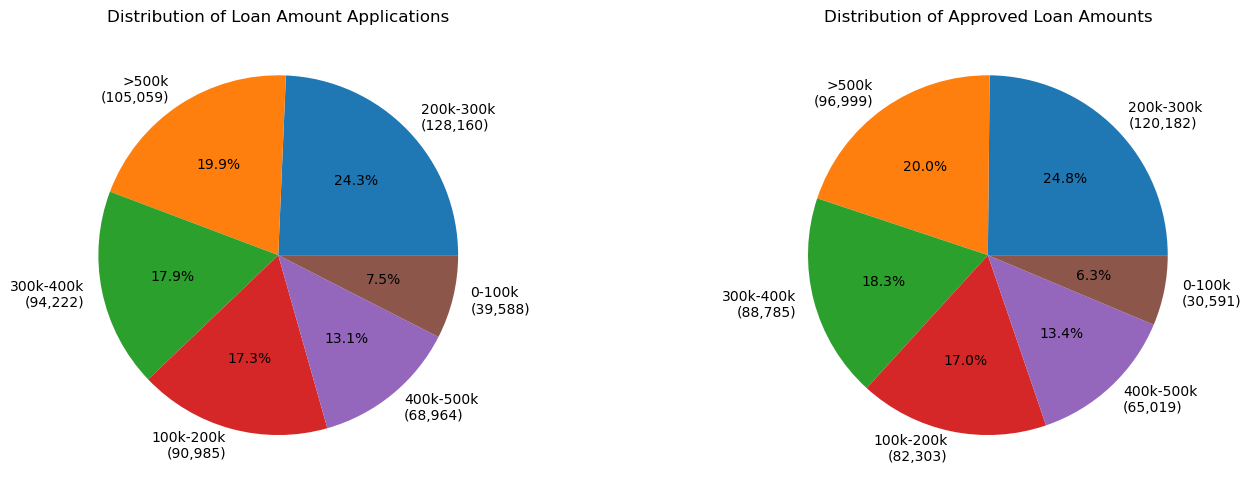


Correlation between Outcome and Loan Amount: 0.0325

Loan amount range with highest approval rate: 400k-500k (94.3%)

Approval Rates by Loan Amount Quartiles:
Q1 ($5,000.00 - $205,000.00): 87.0% approval rate
Q2 ($215,000.00 - $305,000.00): 94.0% approval rate
Q3 ($315,000.00 - $465,000.00): 94.3% approval rate
Q4 ($475,000.00 - $40,000,000.00): 92.7% approval rate


C:\Users\eugen\AppData\Local\Temp\ipykernel_27544\1794048764.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_approval = clean_df.groupby('loan_quartile')['outcome'].mean() * 100


In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create clean dataset excluding undetermined outcomes
clean_df = New_df[New_df['outcome'] != -1].copy()

# Create loan amount bins
bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]
labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '>500k']
clean_df['loan_amount_bins'] = pd.cut(clean_df['loan_amount'], bins=bins, labels=labels)

# Calculate approval rates by loan amount bin
loan_approval = clean_df.groupby('loan_amount_bins').agg({
    'outcome': ['count', 'mean']
}).round(4)
loan_approval.columns = ['Total', 'Approval_Rate']
loan_approval['Approval_Rate'] = loan_approval['Approval_Rate'] * 100

# Create visualizations
plt.figure(figsize=(15, 10))

# Bar chart for approval rates by loan amount
plt.subplot(2, 1, 1)
sns.barplot(x=loan_approval.index, y='Approval_Rate', data=loan_approval.reset_index())
plt.title('Approval Rates by Loan Amount')
plt.xlabel('Loan Amount Range')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)

# Box plot of loan amounts by outcome
plt.subplot(2, 1, 2)
sns.boxplot(x='outcome', y='loan_amount', data=clean_df)
plt.title('Distribution of Loan Amounts by Outcome')
plt.xlabel('Loan Outcome (0=Declined, 1=Approved)')
plt.ylabel('Loan Amount ($)')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nApproval Rates by Loan Amount Range:")
print(loan_approval.sort_values('Approval_Rate', ascending=False))

# Calculate statistics for approved loans
approved_loans = clean_df[clean_df['outcome'] == 1]['loan_amount']
declined_loans = clean_df[clean_df['outcome'] == 0]['loan_amount']

print("\nLoan Amount Statistics for Approved Loans:")
print(f"Minimum: ${approved_loans.min():,.2f}")
print(f"Maximum: ${approved_loans.max():,.2f}")
print(f"Average: ${approved_loans.mean():,.2f}")
print(f"Median: ${approved_loans.median():,.2f}")

print("\nLoan Amount Statistics for Declined Loans:")
print(f"Minimum: ${declined_loans.min():,.2f}")
print(f"Maximum: ${declined_loans.max():,.2f}")
print(f"Average: ${declined_loans.mean():,.2f}")
print(f"Median: ${declined_loans.median():,.2f}")

# Create pie chart for distribution of loan amounts
plt.figure(figsize=(15, 5))

# Distribution of all applications by loan amount
plt.subplot(1, 2, 1)
loan_dist = clean_df['loan_amount_bins'].value_counts()
plt.pie(loan_dist, 
        labels=[f"{range}\n({count:,})" for range, count in loan_dist.items()],
        autopct='%1.1f%%')
plt.title('Distribution of Loan Amount Applications')

# Distribution of approved loans by loan amount
plt.subplot(1, 2, 2)
approved_dist = clean_df[clean_df['outcome'] == 1]['loan_amount_bins'].value_counts()
plt.pie(approved_dist,
        labels=[f"{range}\n({count:,})" for range, count in approved_dist.items()],
        autopct='%1.1f%%')
plt.title('Distribution of Approved Loan Amounts')

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = clean_df['outcome'].corr(clean_df['loan_amount'])
print(f"\nCorrelation between Outcome and Loan Amount: {correlation:.4f}")

# Find the optimal loan amount range (highest approval rate)
optimal_range = loan_approval['Approval_Rate'].idxmax()
print(f"\nLoan amount range with highest approval rate: {optimal_range} ({loan_approval.loc[optimal_range, 'Approval_Rate']:.1f}%)")

# Calculate approval probability by loan amount quartiles
clean_df['loan_quartile'] = pd.qcut(clean_df['loan_amount'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
quartile_approval = clean_df.groupby('loan_quartile')['outcome'].mean() * 100

print("\nApproval Rates by Loan Amount Quartiles:")
for quartile, rate in quartile_approval.items():
    quartile_range = clean_df[clean_df['loan_quartile'] == quartile]['loan_amount']
    print(f"{quartile} (${quartile_range.min():,.2f} - ${quartile_range.max():,.2f}): {rate:.1f}% approval rate")

Contingency Table (Race vs Outcome):
outcome                                        0       1
race                                                    
2 or more minority races                     117     604
American Indian or Alaska Native             505    2195
Asian                                       4437   44356
Black or African American                   3873   17323
Joint                                       1124   13406
Native Hawaiian or Other Pacific Islander    166    1327
White                                      32877  404668

Approval Rates by Race:
                                           Total_Applications  Approval_Rate
race                                                                        
White                                                  437545      92.486030
Joint                                                   14530      92.264281
Asian                                                   48793      90.906482
Native Hawaiian or Other Pacific Islande

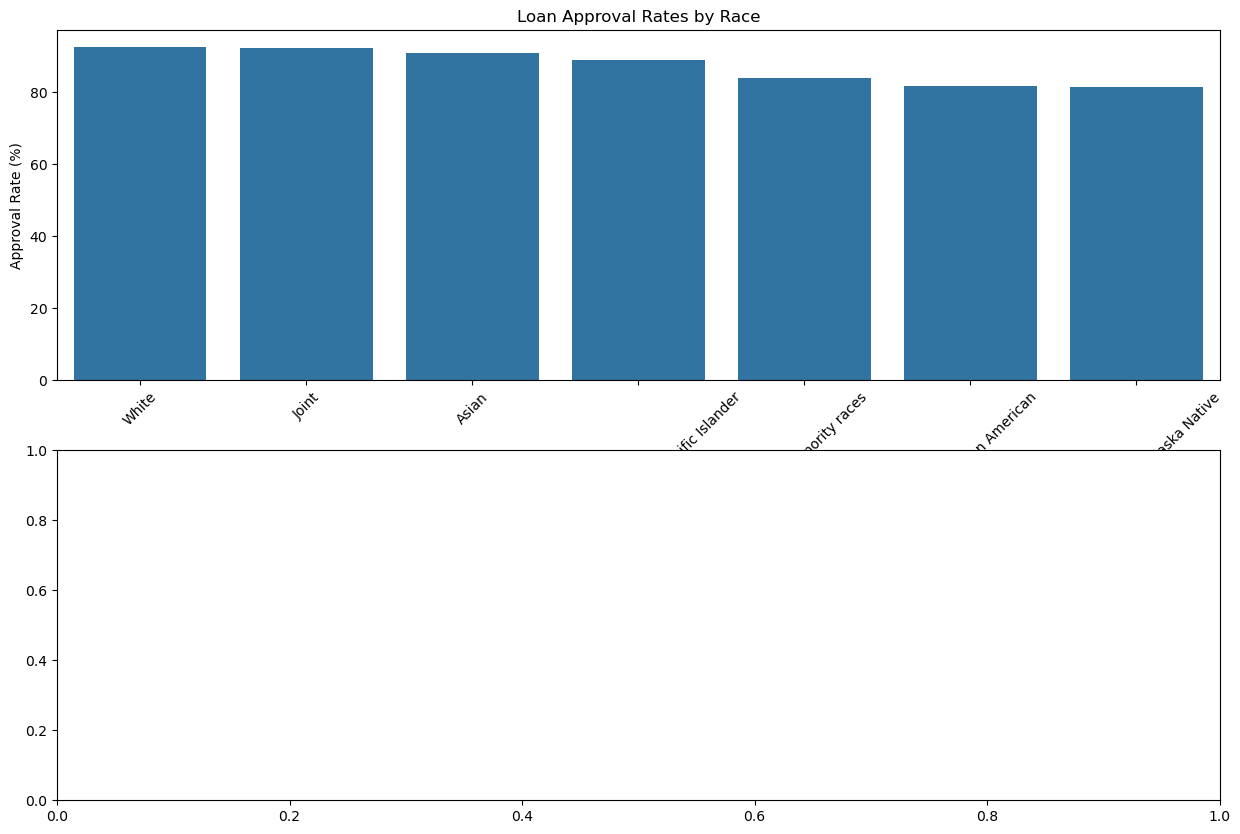

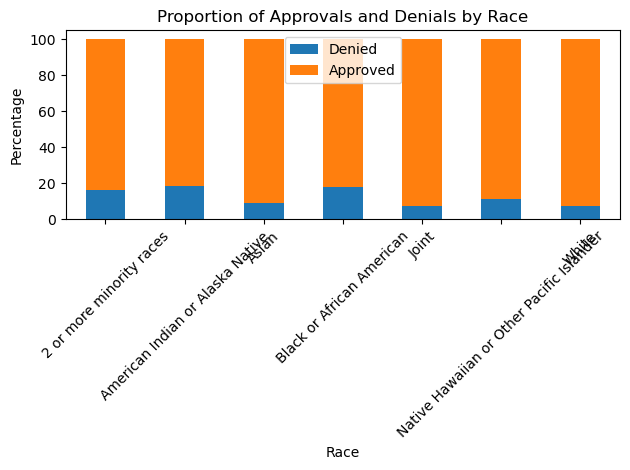


Correlation (Cramer's V) between Race and Outcome: 0.0834

Detailed Analysis by Race:

White:
Total applications: 437,545
Approved: 404,668 (92.5%)
Denied: 32,877 (7.5%)

Joint:
Total applications: 14,530
Approved: 13,406 (92.3%)
Denied: 1,124 (7.7%)

Asian:
Total applications: 48,793
Approved: 44,356 (90.9%)
Denied: 4,437 (9.1%)

Native Hawaiian or Other Pacific Islander:
Total applications: 1,493
Approved: 1,327 (88.9%)
Denied: 166 (11.1%)

2 or more minority races:
Total applications: 721
Approved: 604 (83.8%)
Denied: 117 (16.2%)

Black or African American:
Total applications: 21,196
Approved: 17,323 (81.7%)
Denied: 3,873 (18.3%)

American Indian or Alaska Native:
Total applications: 2,700
Approved: 2,195 (81.3%)
Denied: 505 (18.7%)

Overall approval rate: 91.8%

Disparities from overall approval rate:
White: +0.7 percentage points
Joint: +0.4 percentage points
Asian: -0.9 percentage points
Native Hawaiian or Other Pacific Islander: -2.9 percentage points
2 or more minority races: 

In [267]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Create clean dataset excluding undetermined outcomes
clean_df = New_df[New_df['outcome'] != -1].copy()

# Create contingency table
contingency_table = pd.crosstab(clean_df['race'], clean_df['outcome'])
print("Contingency Table (Race vs Outcome):")
print(contingency_table)

# Calculate approval rates by race
approval_rates = clean_df.groupby('race')['outcome'].agg(['count', 'mean'])
approval_rates.columns = ['Total_Applications', 'Approval_Rate']
approval_rates['Approval_Rate'] = approval_rates['Approval_Rate'] * 100
approval_rates = approval_rates.sort_values('Approval_Rate', ascending=False)

print("\nApproval Rates by Race:")
print(approval_rates)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

# Create visualizations
plt.figure(figsize=(15, 10))

# Bar plot of approval rates by race
plt.subplot(2, 1, 1)
sns.barplot(x=approval_rates.index, y='Approval_Rate', data=approval_rates)
plt.title('Loan Approval Rates by Race')
plt.xlabel('Race')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)

# Stacked bar plot showing proportions
plt.subplot(2, 1, 2)
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Approvals and Denials by Race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.legend(['Denied', 'Approved'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate correlation ratio (Cramer's V)
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

correlation = cramers_v(contingency_table)
print(f"\nCorrelation (Cramer's V) between Race and Outcome: {correlation:.4f}")

# Detailed analysis
print("\nDetailed Analysis by Race:")
for race in approval_rates.index:
    race_data = clean_df[clean_df['race'] == race]
    total = len(race_data)
    approved = race_data['outcome'].sum()
    denied = total - approved
    approval_rate = (approved / total) * 100
    
    print(f"\n{race}:")
    print(f"Total applications: {total:,}")
    print(f"Approved: {approved:,} ({approval_rate:.1f}%)")
    print(f"Denied: {denied:,} ({100-approval_rate:.1f}%)")

# Calculate overall approval rate for comparison
overall_approval = clean_df['outcome'].mean() * 100
print(f"\nOverall approval rate: {overall_approval:.1f}%")

# Calculate disparities from overall approval rate
print("\nDisparities from overall approval rate:")
for race in approval_rates.index:
    disparity = approval_rates.loc[race, 'Approval_Rate'] - overall_approval
    print(f"{race}: {disparity:+.1f} percentage points")